# Phase 2 - Milestones 1

# i. Introduction

This chapter contains the identity, big picture of the dataset used, and the objectives to be achieved.

## 1.1 - Identity

Name  : **Fadya Ulya Salsabila**

Batch : **FTDS-RMT-018**

## 1.2 - Background

A make-up company "Sister" wants to minimize the risk of a customer stopping using their product. The company then analyzes the history of its customers in making purchases based on time and frequency. In addition, this company also looks at the feedback that customers have given it.

This is intended to determine customer predictions whether to stop using their product or not. Because if many customers stop, the company will evaluate product sales and marketing to customers. In addition, the company will also provide discounts and special offers to loyal customers.

## 1.3 - Dataset

The dataset is from Github Milestones 1 Hacktiv8 `churn.csv` that contains 22 columns.
1. `user_id`:	ID of a customer
2. `age`:	Age of a customer
3. `gender`:	Gender of a customer
4. `region_category`:	Region that a customer belongs to
5. `membership_category`:	Category of the membership that a customer is using
6. `joining_date`:	Date when a customer became a member
7. `joined_through_referral`:	Whether a customer joined using any referral code or ID
8. `preferred_offer_types`:	Type of offer that a customer prefers
9. `medium_of_operation`:	Medium of operation that a customer uses for transactions
10. `internet_option`:	Type of internet service a customer uses
11. `last_visit_time`:	The last time a customer visited the website
12. `days_since_last_login`:	Number of days since a customer last logged into the website
13. `avg_time_spent`:	Average time spent by a customer on the website
14. `avg_transaction_value`:	Average transaction value of a customer
15. `avg_frequency_login_days`:	Number of times a customer has logged in to the website
16. `points_in_wallet`:	Points awarded to a customer on each transaction
17. `used_special_discount`:	Whether a customer uses special discounts offered
18. `offer_application_preference`:	Whether a customer prefers offers
19. `past_complaint`:	Whether a customer has raised any complaints
20. `complaint_status`:	Whether the complaints raised by a customer was resolved
21. `feedback`:	Feedback provided by a customer
22. `churn_risk_score`:	Churn score (0 : Not churn, 1 : Churn)

## 1.4 - Objective

The objectives from this analysis and modeling in this dataset are:
1. Find out the customer prediction, whether customer churn or not.
2. Find out the best model prediction using Artificial Neural Network (ANN).

## 1.5 - Problem Statement

From the objectives above, so the problem statements from this analysis and modeling in this dataset are:

1. What are the predictions for the customer?
2. How to determine the best model using ANN on this customer prediction?

# ii. Import Libraries

This chapter contains all the libraries used in the project.


In [1]:
!pip install feature-engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.4/319.4 KB 6.0 MB/s eta 0:00:00


In [2]:
# Import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from feature_engine.outliers import Winsorizer

# For ANN Problems
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model

# Evaluate ANN Models
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, precision_score, recall_score, f1_score

# iii. Data Loading

This chapter contains the data preparation process prior to further data exploration. The Data Loading process is in the form of displaying data and data types, giving new names to several columns, checking the size of the dataset, and seeing missing values.

## 2.1 - Load Data

In [191]:
# Load Data

data = pd.read_csv('/content/drive/MyDrive/Hacktiv8 - Fadya Ulya/phase 2/churn.csv')
data

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


In [4]:
# Load head 10 data

data.head(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97000,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93000,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22000,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04000,Yes,No,No,Not Applicable,Poor Product Quality,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,...,1397.318999,29664.01,28.0,782.49000,No,Yes,Yes,Unsolved,Poor Product Quality,0
6,a52bc51378ecb057,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,...,416.300000,13160.39,24.0,712.94000,Yes,No,No,Not Applicable,No reason specified,1
7,94f338d20bf0f2b2,15,M,City,No Membership,2016-09-11,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.070000,9151.14,29.0,655.43000,Yes,No,No,Not Applicable,No reason specified,1
8,85c7996b17862e57,49,M,Town,Platinum Membership,2017-04-24,Yes,Without Offers,NaN,Fiber_Optic,...,650.120000,81628.48,11.0,0.00000,Yes,Yes,No,Not Applicable,Products always in Stock,0
9,8a1625846d7a198b,35,F,Town,Basic Membership,2016-12-01,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,...,106.230000,28232.59,16.0,984.93392,No,Yes,No,Not Applicable,Too many ads,1


In [5]:
# Load tail 10 data

data.tail(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37000,8a0fff47b7846031,25,F,Town,No Membership,2017-01-20,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,119.830000,13147.91,0.0,1019.382051,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
37001,8832eec42dc0e347,38,M,Town,Silver Membership,2016-09-19,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.790000,30820.83,23.0,631.830000,Yes,No,Yes,Unsolved,Poor Customer Service,1
37002,b9d9761f4d367c7a,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,...,499.510000,17110.71,24.0,587.010000,Yes,No,No,Not Applicable,Poor Customer Service,1
37003,a38816e7522f5f7b,42,F,Town,Basic Membership,2017-07-05,Yes,Gift Vouchers/Coupons,Both,Wi-Fi,...,529.580000,42964.11,18.0,619.280000,Yes,Yes,No,Not Applicable,Poor Product Quality,1
37004,8968d0458164dda9,19,F,Town,Gold Membership,2016-07-17,Yes,Without Offers,Smartphone,Fiber_Optic,...,119.960000,14218.43,7.0,781.840000,Yes,No,No,Not Applicable,Too many ads,0
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.520000,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.980000,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.900000,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.990000,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,...,972.776679,26905.49,22.0,700.930000,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [6]:
# Duplicate dataset for backup

df1 = data.copy()

From load data above, dataset `churn` have `37010 rows` and `22 columns`.

## 2.2 - Data Info

In [7]:
# Show the data info

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

Based on the data information above, some columns have missing values such as `gender, region_category, joined_through_referral, preferred_offer_types, medium_of_operation`. The missing value columns are categorical data, we must make sure about kind of missing value. Beside that, we must check the duplicate values too.

## 2.3 - Duplicate Values

In [8]:
# Show the duplicate rows

duplicate = df1.duplicated().sum()
print("Duplicate Rows :", duplicate)

Duplicate Rows : 18


The data has 18 duplicate values, so drop the duplicate.

In [9]:
# Drop the duplicates rows

df2 = df1.drop_duplicates()

In [10]:
# Makesure that the duplicate rows dropped

duplicate = df2.duplicated().sum()
print("Duplicate Rows :", duplicate)

Duplicate Rows : 0


In [11]:
# Drop uder_id column because not very important

df2.drop("user_id", axis=1, inplace=True)

In [12]:
# Check shape of dataframe after drop duplicate

df2.shape

(36992, 21)

Duplicated rows and `user_id` column have been dropped. After that, we must check missing values.

## 2.4 - Check Missing Values

In [13]:
# Show missing values

mv = df2.isna().sum() # define the missing values and look for each columns
print('\nJumlah missing value per kolom:\n', mv) # print mv


Jumlah missing value per kolom:
 age                                0
gender                            59
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral         5438
preferred_offer_types            288
medium_of_operation             5393
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64


`gender` column have 59 missing values, `region_category` have 5428 missing values, `joined_through_referral` have 5438 missing values, `preffered_offer_types` have 288 missing values, and `medium_of_operation` have 5393 missing values. From the data above, the first thing to do is check what **kind of missing value** in these columns. Because kind of missing values can determine the best method to handle it.

Before that, check the percentage of missing values in each columns.

In [14]:
# Show the percentage of missing value per column

mv_percent = df2.isnull().sum() * 100 / len(df2)
mv_percent

age                              0.000000
gender                           0.159494
region_category                 14.673443
membership_category              0.000000
joining_date                     0.000000
joined_through_referral         14.700476
preferred_offer_types            0.778547
medium_of_operation             14.578828
internet_option                  0.000000
last_visit_time                  0.000000
days_since_last_login            0.000000
avg_time_spent                   0.000000
avg_transaction_value            0.000000
avg_frequency_login_days         0.000000
points_in_wallet                 0.000000
used_special_discount            0.000000
offer_application_preference     0.000000
past_complaint                   0.000000
complaint_status                 0.000000
feedback                         0.000000
churn_risk_score                 0.000000
dtype: float64

`gender` column have 0.15% missing values. Meanwhile `region_category, joined_through_referral, preferred_offer_types, medium_of_operation` column have 14.67%, 14.7%, 0.77%, and 14.57% missing values. From the data above, the missing value in the column above is included in the **CMAR** (Missing Completely at Random) type because the data doesn’t have a pattern of missingness. There is no association between the missing indicator and any observed variable.

Missing value will be handle in **Data Preprocessing** chapter.

## Coclusion Data Loading

1. The final data that will be use for analysis is `36992 rows and 21 columns`.
2. Duplicate values in the dataset has been dropped.
3. Kind of missing values in this data is MCAR, so missing value will be handle with impute method in Data Prepocessing chapter.

# iv. Exploratory Data Analysis (EDA)

This chapter contains data exploration on the dataset above by using queries, groupings, simple visualizations, and so on.

## 4.1 - Statistic Descriptive

In [17]:
# Show statistic descriptive in numeric columns

df2.describe().T

,count,mean,std,min,25%,50%,75%,max
age,36992.0,37.118161,15.867412,10.00,23.0000,37.000,51.0000,64.000000
days_since_last_login,36992.0,-41.915576,228.819900,-999.00,8.0000,12.000,16.0000,26.000000
avg_time_spent,36992.0,279.147450,329.947709,0.00,60.1025,161.765,356.5150,3235.578521
avg_transaction_value,36992.0,29271.194003,19444.806226,800.46,14177.5400,27554.485,40855.1100,99914.050000
avg_frequency_login_days,36992.0,14.658617,9.479184,0.00,7.0000,14.000,22.0000,73.061995
points_in_wallet,36992.0,623.562421,270.263994,0.00,574.1350,680.370,757.0025,2069.069761
churn_risk_score,36992.0,0.540982,0.498324,0.00,0.0000,1.000,1.0000,1.000000


Based on data describe above, it can be known that:
*   `Age` of customer is between 23-64 years old.
*   The `days since last login` have negative values and maximum value is just 26. The data in this column maybe have an outlier.
*   `Average customer had transaction` have mean 29271 times.
*   There are some customers that have many `points in wallet`.



## 4.2 - Data Target Distribution

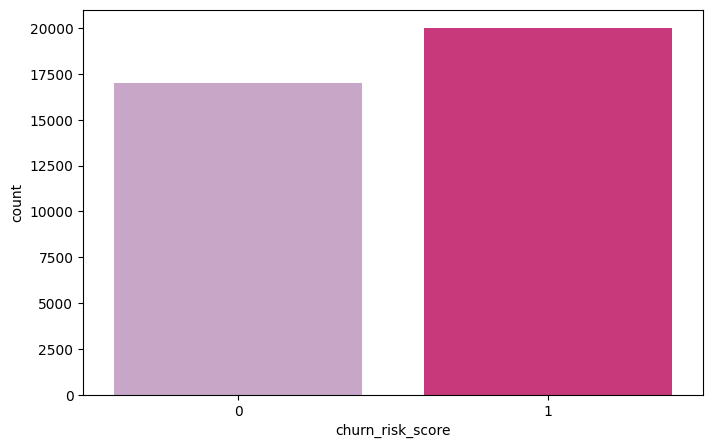

In [18]:
# Show sum visualization of data target (churn_risk_score)

plt.figure(figsize=(8,5))
ax = sns.countplot(x='churn_risk_score', data=df2, palette="PuRd")

In [19]:
# Menghitung kejadian kematian

df2.churn_risk_score.value_counts()

1    20012
0    16980
Name: churn_risk_score, dtype: int64

Based on data visualization and calculation above, data target for modeling (`churn_risk_score`) included in the data `balance` because the two targets do not have a very significant difference. So, for modeling analysis can use accuracy and f1-score. 

## 4.3 - Gender and Age Based

In [20]:
# Calculate customer based on gender

df2.gender.value_counts()

F    18490
M    18443
Name: gender, dtype: int64

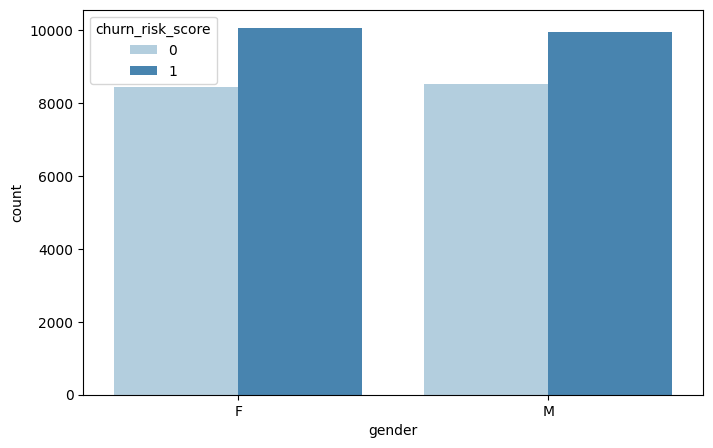

In [21]:
# Show visualization gender based on churn_risk_score

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='gender', data=df2, hue="churn_risk_score", palette="Blues")

Based on visualization data above, concluded that `female` customers dominate more than `males`. However, there is actually no significant difference between male and female customers. The amount between the gender is almost the same.

In [22]:
# Duplicate to make agerange

df3 = df2.copy()

In [23]:
# Group by age to range

bins = [8, 20, 30, 40, 50, 60, 120]
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69']
df3['agerange'] = pd.cut(df3.age, bins, labels = labels, include_lowest = True)

print(df3)

       age gender region_category membership_category joining_date  \
0       29      F             NaN       No Membership   2017-04-05   
1       50      M             NaN    Basic Membership   2017-03-31   
2       26      F            City   Silver Membership   2017-02-11   
3       63      F         Village       No Membership   2015-12-23   
4       64      M            Town   Silver Membership   2015-03-20   
...    ...    ...             ...                 ...          ...   
37005   36      M            Town     Gold Membership   2015-03-05   
37006   27      F            City     Gold Membership   2017-01-15   
37007   20      M             NaN     Gold Membership   2015-07-11   
37008   38      F            City     Gold Membership   2016-05-25   
37009   36      M            Town     Gold Membership   2016-10-18   

      joined_through_referral     preferred_offer_types medium_of_operation  \
0                         Yes            Without Offers                 NaN   
1

In [24]:
# Groupby age customer based on churn_risk_score

age = df3.groupby(['agerange','churn_risk_score']).size().reset_index(name='counts')
print(age)

   agerange  churn_risk_score  counts
0     10-19                 0    3413
1     10-19                 1    3874
2     20-29                 0    3090
3     20-29                 1    3645
4     30-39                 0    3014
5     30-39                 1    3680
6     40-49                 0    3143
7     40-49                 1    3645
8     50-59                 0    3057
9     50-59                 1    3717
10    60-69                 0    1263
11    60-69                 1    1451


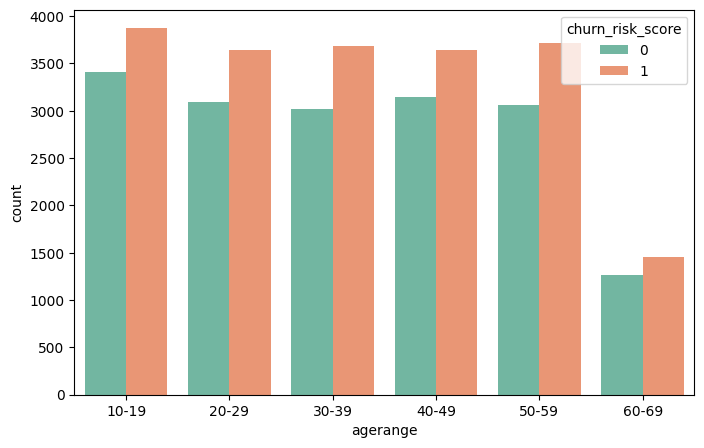

In [25]:
# Show visualization age based on churn_risk_score

plt.figure(figsize=(8,5))
ax = sns.countplot(x='agerange', data=df3, hue="churn_risk_score", palette="Set2")

Like gender data, most customers who access this product to buy or churn are in the `10-19 years age group`. And the fewest customers are in the `60-69 age group`.
Concluded from the data above, there is actually **no significant difference based on churn or not**.

## 4.4 - Heatmap Correlation

<Axes: >

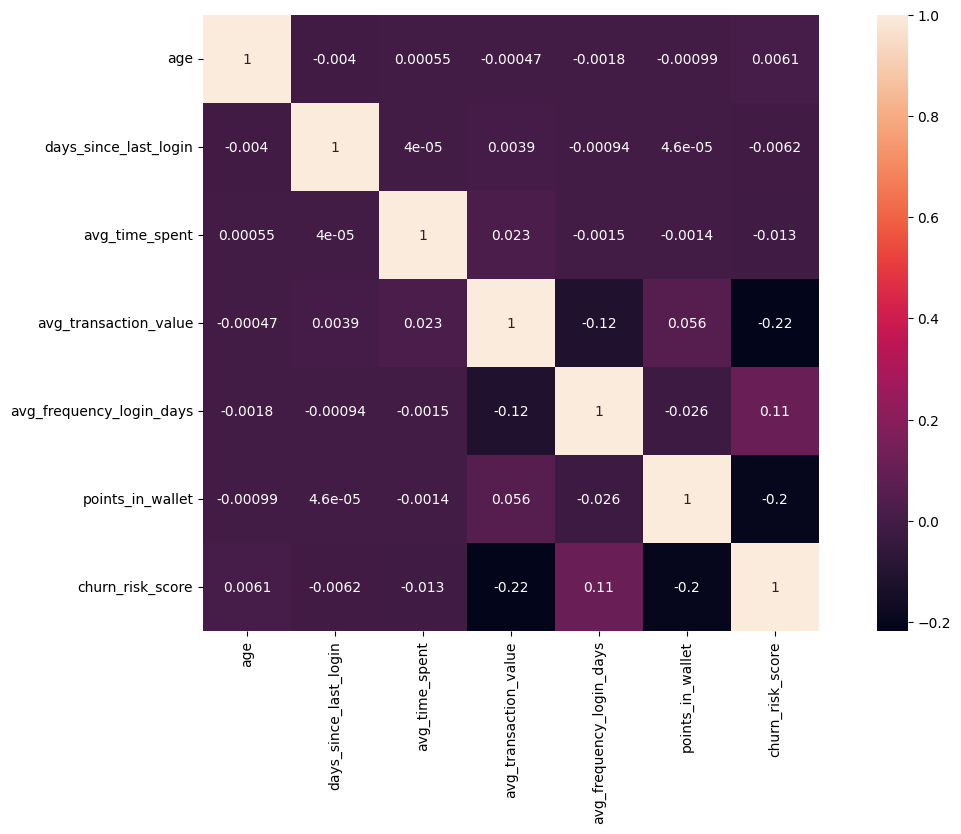

In [26]:
# Show correlation each numeric columns using heatmap correlation

fig = plt.figure(figsize = (15,8))

sns.heatmap(df2.corr(), annot = True, square = True)

The heatmap correlation above shows that the column that has a very high relationship with churn risk is the `avg_freqeuncy_login_days` column with score `0.11`. This column shows how many customers log in in a day. This means they are still interested in the product in this company. Meanwhile, `avg_transaction_value` have a strong negative correlation with churn risk witn score `-0.22`. This shows that the number of purchase transactions on this product has no significant effect on customer churn.

## 4.6 - Categorical Columns Based on Churn Risk

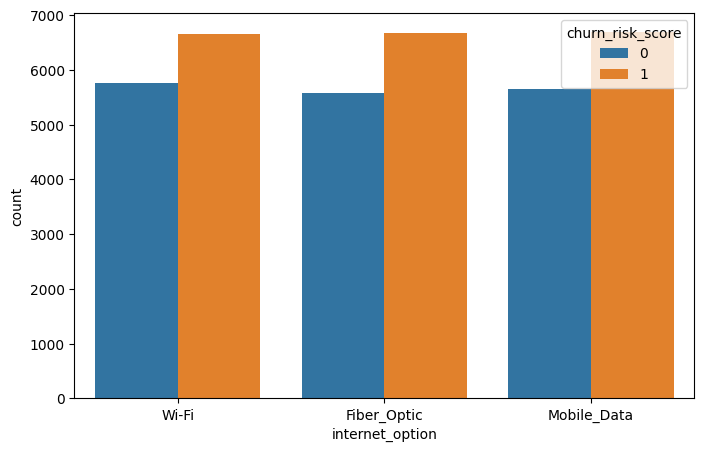

In [27]:
# Show bar chart internet option based on churn risk

plt.figure(figsize=(8,5))
ax = sns.countplot(x='internet_option', data=df2, hue='churn_risk_score')

Bar plot visualization above, shows that the `internet option` of customers doesn't have a strong correlation with churn risk. Distribution of internet option data almost have the same number of values and there is no significant difference. Customers who use the internet with Wi-Fi, Fiber Optic, and Mobile Data are almost the same.

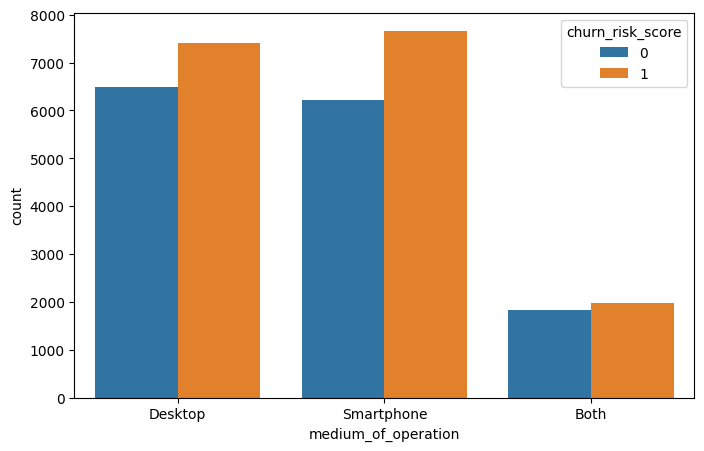

In [28]:
# Show bar chart medium operation based on churn risk

plt.figure(figsize=(8,5))
ax = sns.countplot(x='medium_of_operation', data=df2, hue='churn_risk_score')

Based on visualization above, shows that customers that use `smartphone` have the highest churn than the other. But, the medium of operation is not a main factor that the customer stops buying the product or not.

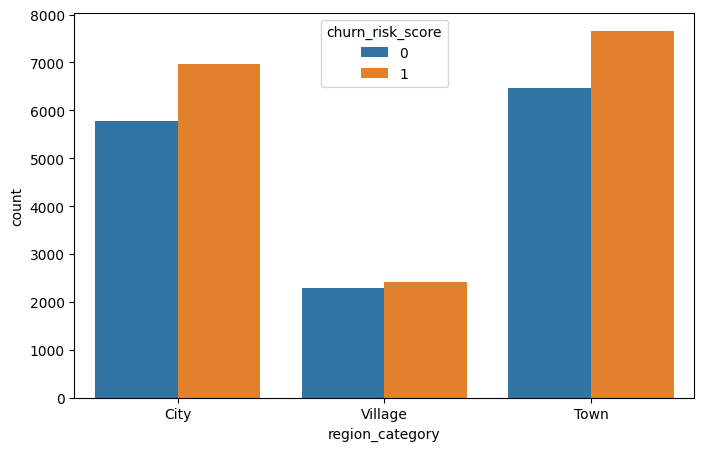

In [29]:
# Show bar chart region category based on churn risk

plt.figure(figsize=(8,5))
ax = sns.countplot(x='region_category', data=df2, hue='churn_risk_score')

Based on customer region, there is no significant correlation with churn risk. It's just that many customers of this product live in town areas compared to villages and cities

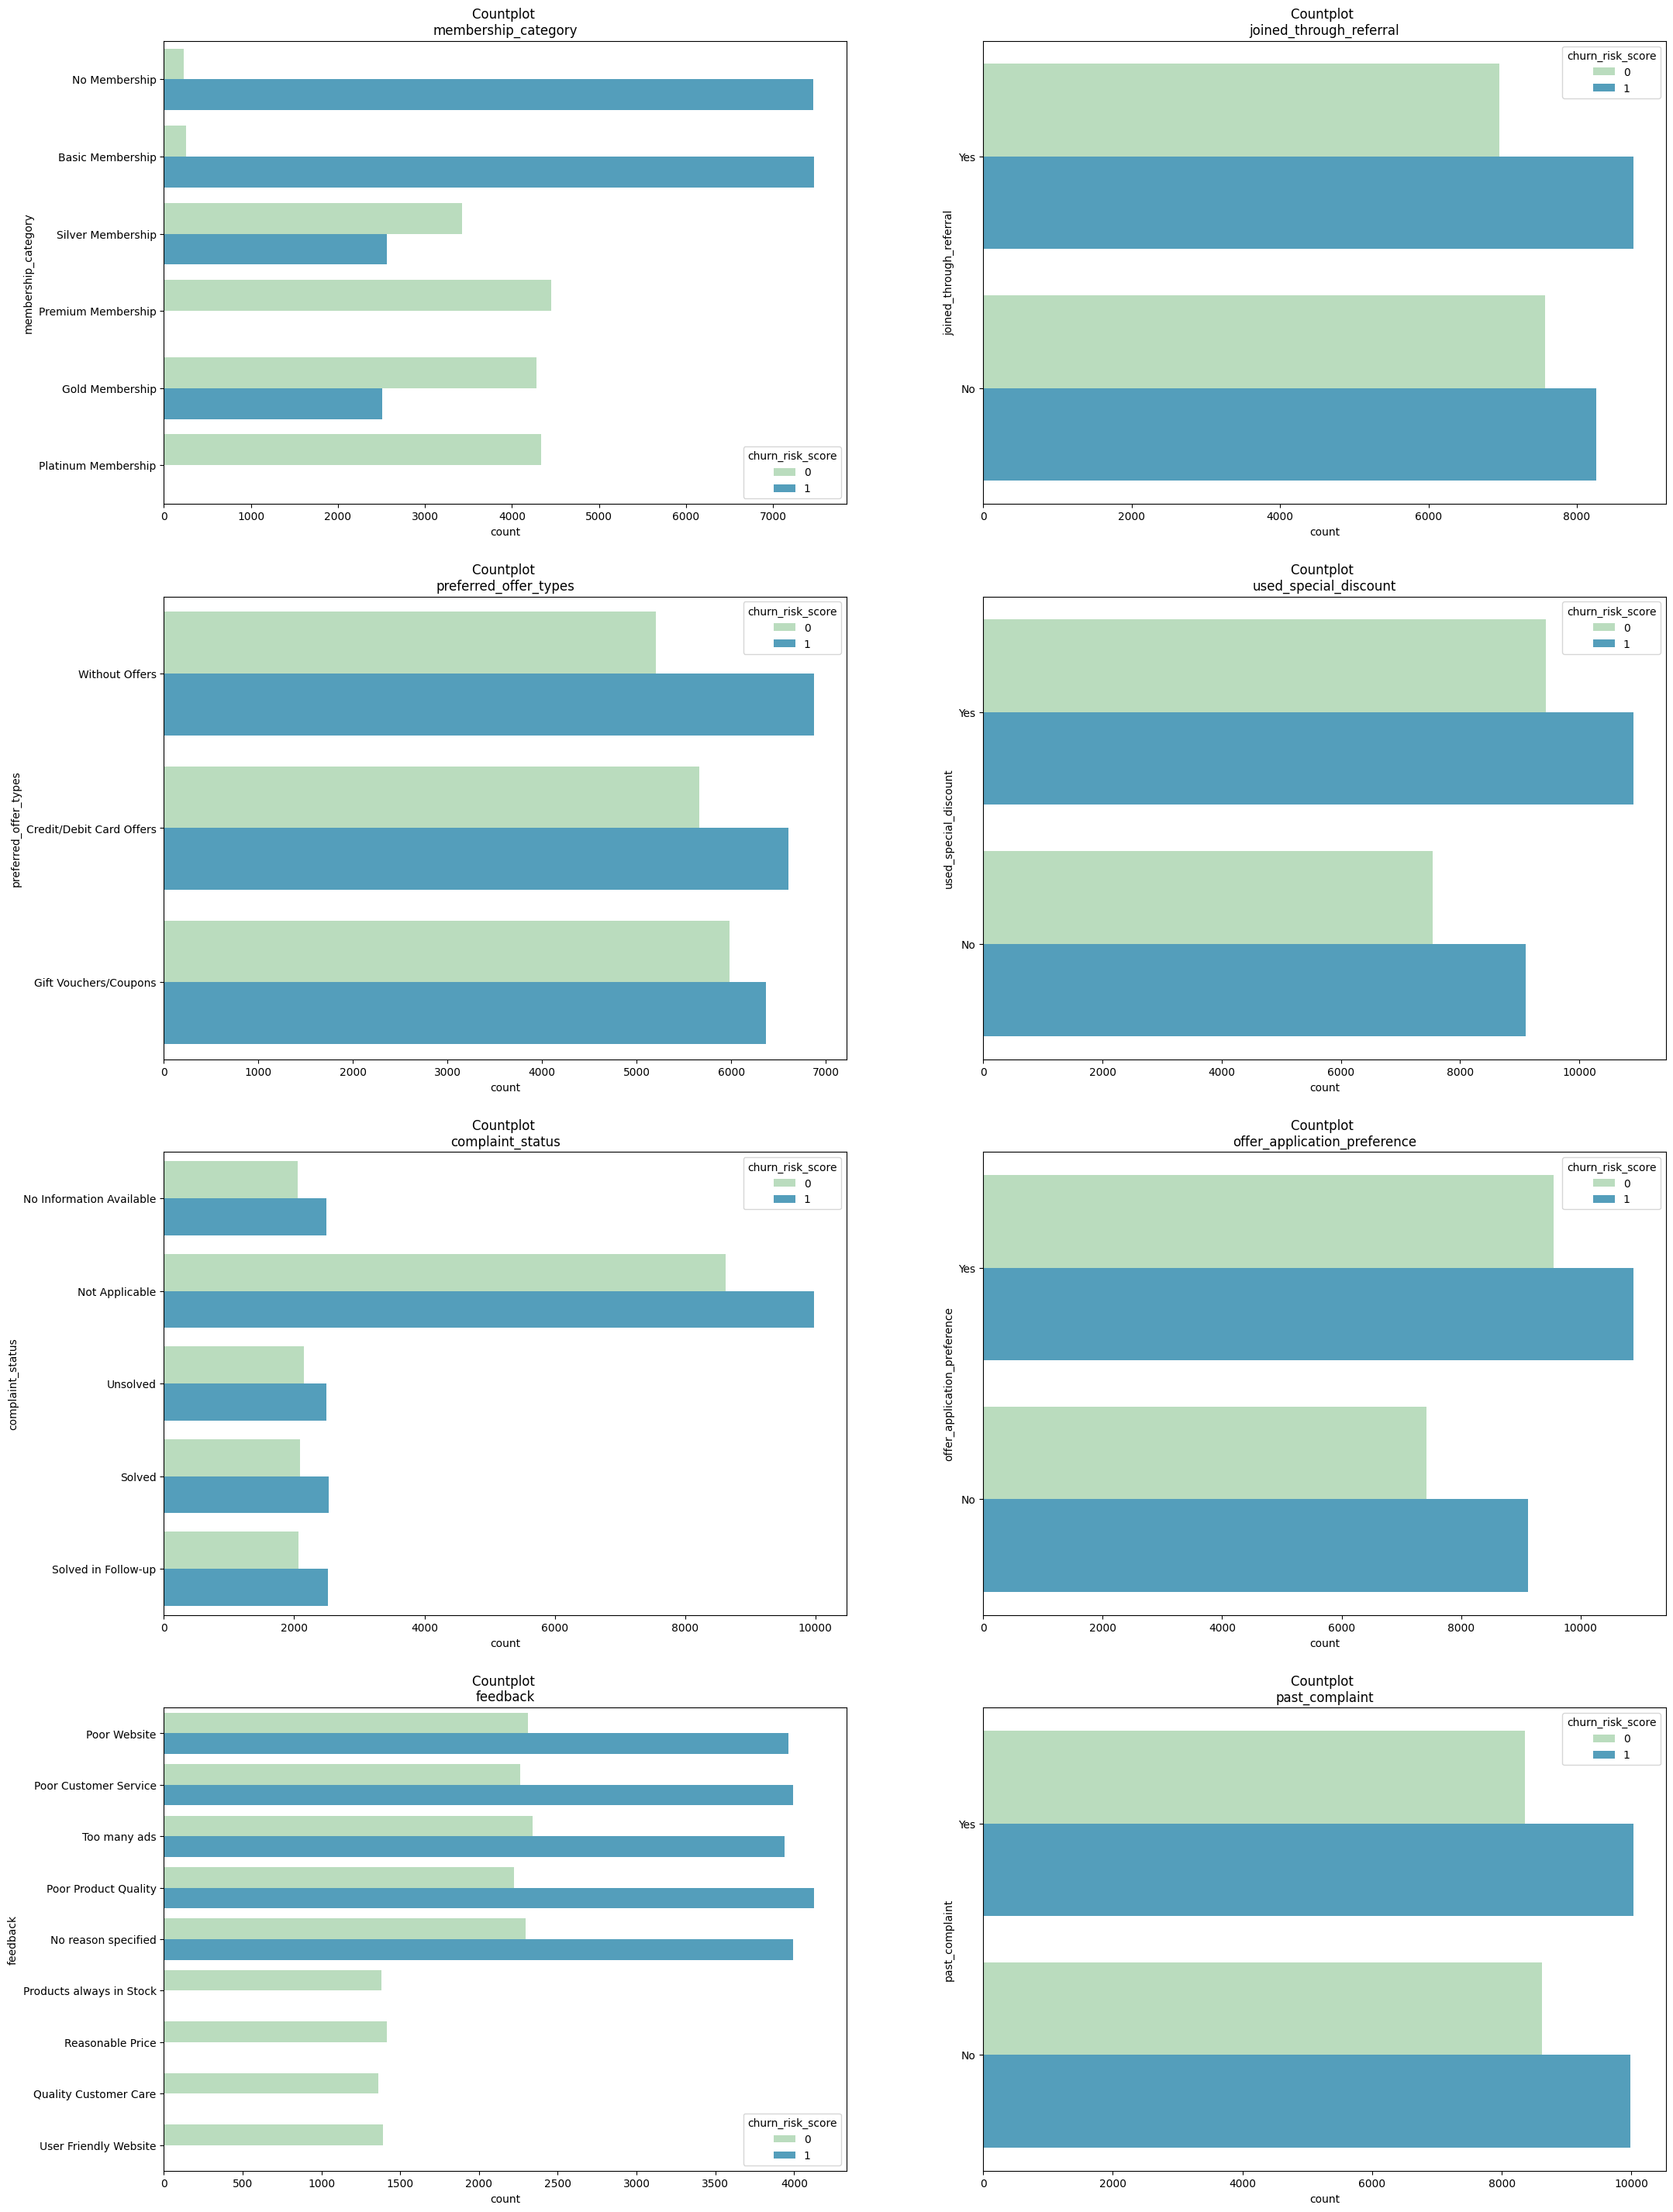

In [30]:
# Show bar plot on another categorical columns

plt.figure(figsize=(25, 45))

plt.subplot(5, 2, 1)
sns.countplot(y = "membership_category", hue="churn_risk_score", data = df2, palette="GnBu")
plt.title('Countplot \nmembership_category')

plt.subplot(5, 2, 2)
sns.countplot(y = "joined_through_referral", hue="churn_risk_score", data = df2, palette="GnBu")
plt.title('Countplot \njoined_through_referral')

plt.subplot(5, 2, 3)
sns.countplot(y = "preferred_offer_types", hue="churn_risk_score", data = df2, palette="GnBu")
plt.title('Countplot \npreferred_offer_types')

plt.subplot(5, 2, 4)
sns.countplot(y = "used_special_discount", hue="churn_risk_score", data = df2, palette="GnBu")
plt.title('Countplot \nused_special_discount')

plt.subplot(5, 2, 5)
sns.countplot(y = "complaint_status", hue="churn_risk_score", data = df2, palette="GnBu")
plt.title('Countplot \ncomplaint_status')

plt.subplot(5, 2, 6)
sns.countplot(y = "offer_application_preference", hue="churn_risk_score", data = df2, palette="GnBu")
plt.title('Countplot \noffer_application_preference')

plt.subplot(5, 2, 7)
sns.countplot(y = "feedback", hue="churn_risk_score", data = df2, palette="GnBu")
plt.title('Countplot \nfeedback')

plt.subplot(5, 2, 8)
sns.countplot(y = "past_complaint", hue="churn_risk_score", data = df2, palette="GnBu")
plt.title('Countplot \npast_complaint')

plt.show()

Based on data visualization above, it shows that:
*   In `membership_category` column, customers which include in `No Membership` dan `Basic Membership` are customers with the **highest churn risk**. This can happen because the customer is deemed not a loyal customer so the risk of stopping the transaction is high. In contrast to silver, premium, gold, and platinum members where customers are considered loyal to product transactions.
*   In `joined_through_referral` column, customers who buy products because of a **referral code** have a **higher risk** of churn compared to customers who buy without using a referral code.
*   In `preffered_offer_types` column, shows that `Without Offers` have a **higher risk** of churn customer than giving offers through credit/debit cards and gift vouchers/coupons.
*   In `used_special_discount` column, customers which did transaction with special discount have a **higher risk** of churn than not used.
*   In `complaint_status`, the majority of customer risk for churn is on complaints that are `Not Applicable`. However, there is no significant difference in other statuses either.
*   In `offer_application_preference` column, customers that agree with offer have a **highest risk** of churn than not.
*   In `feedback` column, known that the `Poor Product Quality` has a big effect on customer satisfaction, so if the product quality is **poor** then the customer is at **high risk** for churn.
*   In `past_complaint` column, there is no significant effect on churn risk customers.



## Conclusion EDA

1. The target data is **balanced**.
2. Customers in this company varies greatly, ranging from 10-64 years old. Gender distribution is normal between men and women.
3. Based on heatmap correlation, `avg_frequency_login_days` has highest score with `churn_risk_score`. It means both columns have strong correlation. Meanwhile, `points_in_wallet and avg_transaction_value` have (negative) correlation with churn risk. It means the columns don't have a correlation with churn risk.
4. Column `gender, age, internet_option, medium_operation, and region_country` don't have strong correlation with churn risk. Because the distribution of the data is same enough.

# v. Data Preprocessing

This chapter contains the process of preparing data for the model training process, such as dividing data into train-tests, data transformation (normalization, encoding, etc.), and other processes needed.

## 5.1 - Split Between `X` (features) and `y` (Target)

In [31]:
# Splitting between `X` dan `y`
# `y` (target) is churn_risk_score

X = df2.drop(['churn_risk_score'], axis=1) # features
y = df2['churn_risk_score'] # target
X

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website
1,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service
2,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads
3,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads
4,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,09:32:50,15,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website
37006,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,02:28:52,15,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price
37007,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,17:50:38,13,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service
37008,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,17:07:57,-999,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website


The features have `20 columns` that will use in modeling. Before that, it will enter to the data preprocessing.

## 5.2 - Split Between Train-Set, Val-Set, and Test-Set

In [32]:
# Split between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=30)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (23674, 20)
Val Size :  (5919, 20)
Test Size :  (7399, 20)


Based on results above, `Train-Set` has `23674 rows and 20 columns`, `Validation-Set` has `5919 rows and 20 columns`, and the `Test-Set` has `7399 rows and 20 columns`.

## 5.3 - Handling Outlier

Check skewness value in numeric data only, such as `days_since_last_login, avg_time_spent, avg_transaction_value, avg_frequency_login_days, points_in_wallet`.

### Skewness

In [33]:
# Make a function of histogram and boxplot
# Make a function with add variable from the dataframe

def diagnostic_plots(data, variable):
    # Define figure size for visualization
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[variable])
    plt.title('Boxplot')

    plt.show()

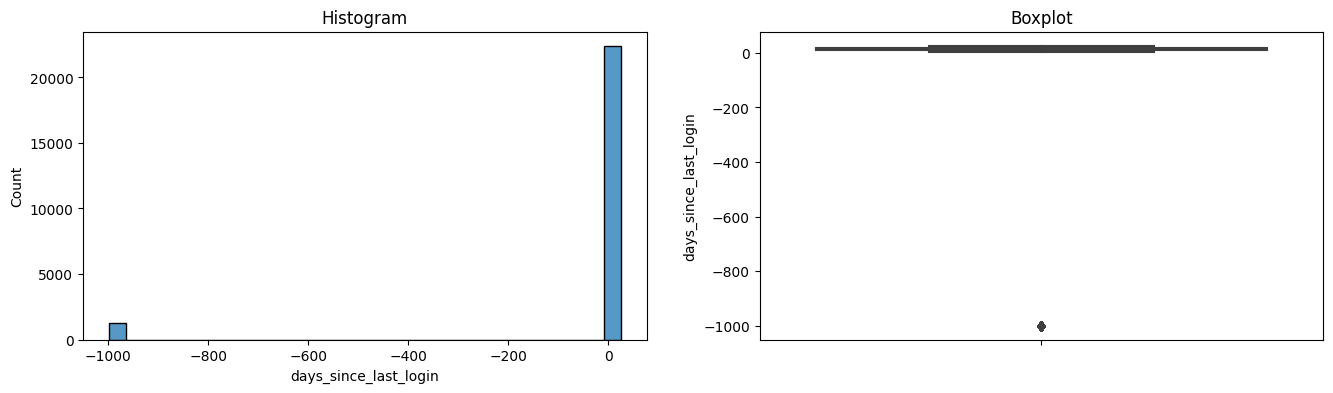


Skewness Value Last Login :  -3.902340413323808


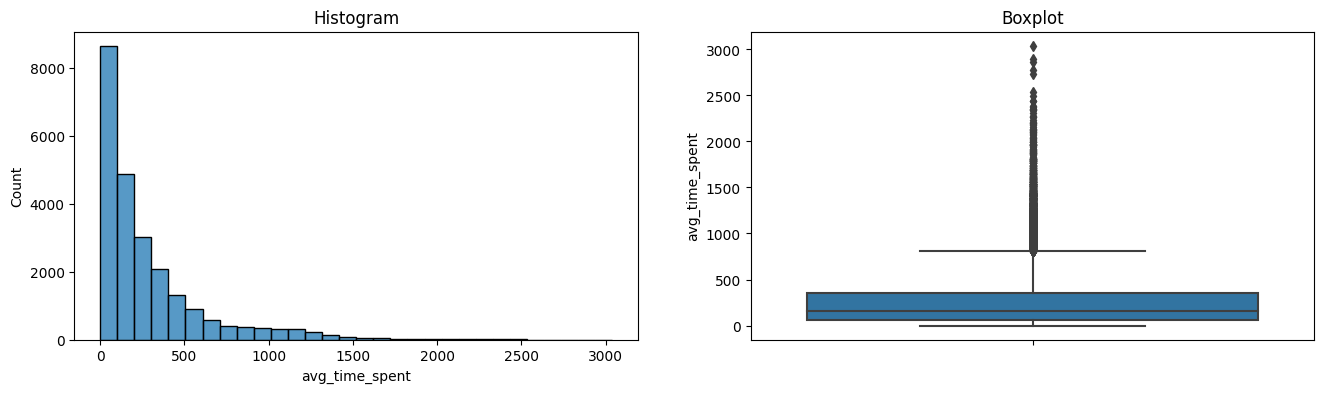


Skewness Value Average of Time :  2.217437057949418


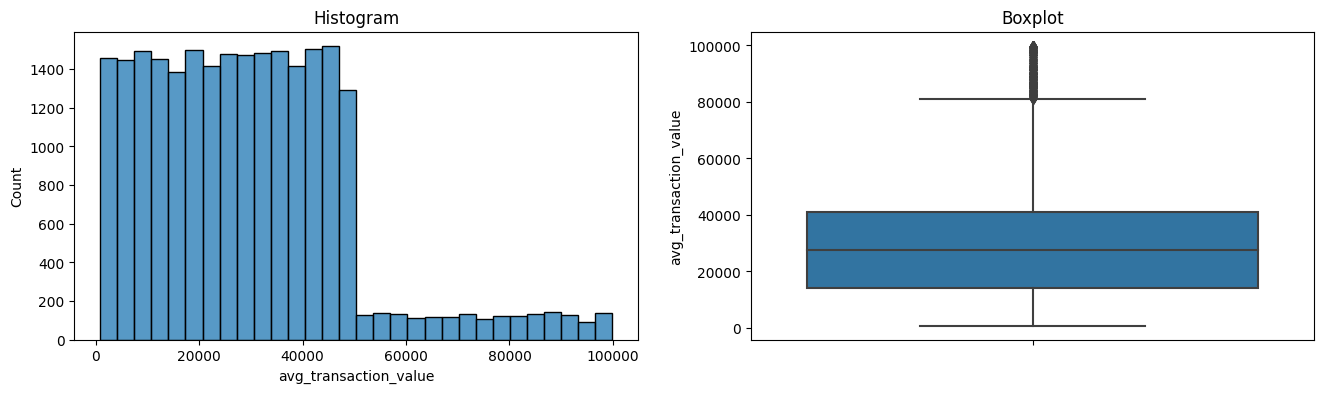


Skewness Value Average Transaction :  1.004023818123382


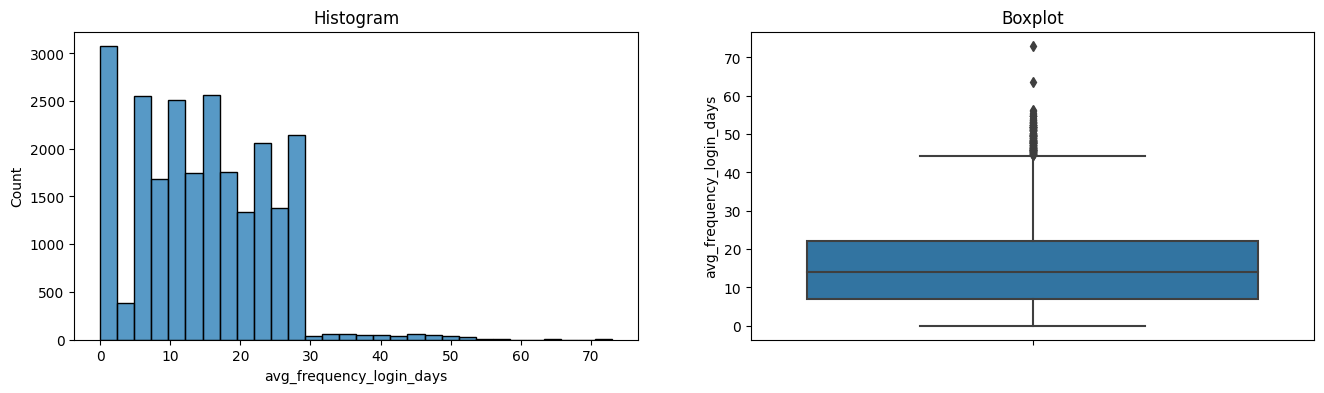


Skewness Value Average Login :  0.3728821528837732


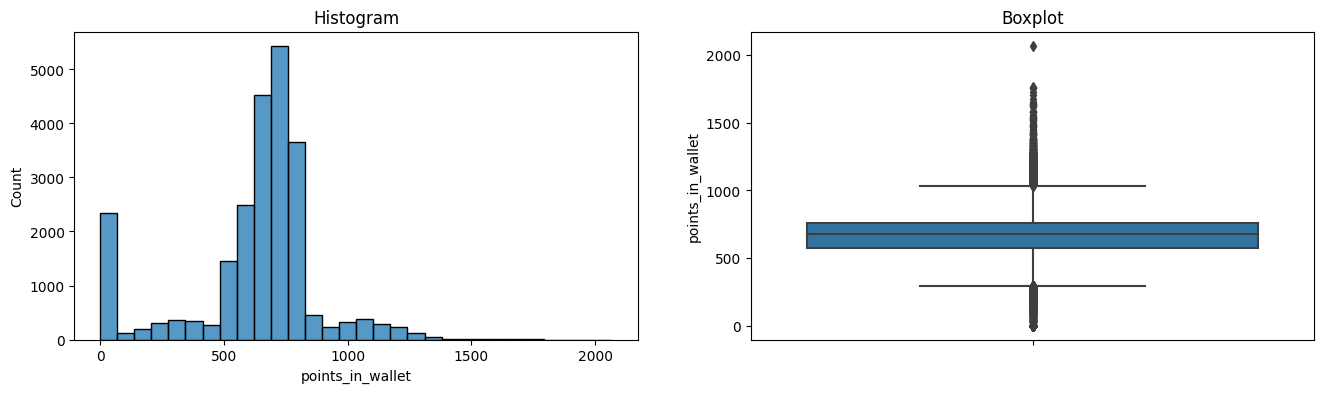


Skewness Value Points :  -0.7849664096211495


In [34]:
# Make a diagram with add the variable
# Last login
diagnostic_plots(X_train, 'days_since_last_login')
print('\nSkewness Value Last Login : ', X_train['days_since_last_login'].skew())

# Average of Time
diagnostic_plots(X_train, 'avg_time_spent')
print('\nSkewness Value Average of Time : ', X_train['avg_time_spent'].skew())

# Average Transaction
diagnostic_plots(X_train, 'avg_transaction_value')
print('\nSkewness Value Average Transaction : ', X_train['avg_transaction_value'].skew())

# Average Login
diagnostic_plots(X_train, 'avg_frequency_login_days')
print('\nSkewness Value Average Login : ', X_train['avg_frequency_login_days'].skew())

# Points
diagnostic_plots(X_train, 'points_in_wallet')
print('\nSkewness Value Points : ', X_train['points_in_wallet'].skew())

Based on the visualization of skewness value above, shows that skewness values in each column:
1. `days_since_last_login`: -3.902340413323808
2. `avg_time_spent`: 2.217437057949418
3. `avg_transaction_value`: 1.004023818123382
4. `avg_frequency_login_days`: 0.3728821528837732
5. `points_in_wallet`: -0.7849664096211495

All the numeric columns have a skewed distribution except `avg_frequency_login_days`, because the value is -0.5> x <0.5. So, the next step is checking outlier in skewness columns and normal column.

### Normal Distribution Outlier

In [35]:
# Function to find upper and lower boundaries for normally distributed variables
# Calculate the boundaries outside which sit the outliers for a Gaussian distribution

def find_normal_boundaries(df, variable):
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

In [36]:
# calculate boundaries for avg_frequency_login_days X_train

upper_boundary, lower_boundary = find_normal_boundaries(X_train, 'avg_frequency_login_days')
upper_boundary, lower_boundary

(42.98354802244488, -13.767847679908039)

From the above we conclude that outlier values in `X_train` bigger than 42.9 or smaller than -13.76 occur very rarely for the variable `avg_frequency_login_days`. Therefore, we can consider them outliers.

In [37]:
# calculate boundaries for avg_frequency_login_days X_val

upper_boundary, lower_boundary = find_normal_boundaries(X_val, 'avg_frequency_login_days')
upper_boundary, lower_boundary

(43.51192128972208, -13.921992277995898)

From the above we conclude that outlier values in `X_val` bigger than 43.5 or smaller than -13.92 occur very rarely for the variable `avg_frequency_login_days`. Therefore, we can consider them outliers.

In [38]:
# Inspect the number and percentage of outliers for `avg_frequency_login_days`

print('Total number of customers: {}'.format(len(X_train)))
print('Customers with more than 43.1 login freq (right end outliers) : {}'.format(len(X_train[X_train['avg_frequency_login_days'] > upper_boundary])))
print('Houses with less than -13.78 login freq (left end outliers.  : {}'.format(len(X_train[X_train['avg_frequency_login_days'] < lower_boundary])))
print('')
print('% right end outliers : {}'.format(len(X_train[X_train['avg_frequency_login_days'] > upper_boundary]) / len(X_train) * 100))
print('% left end outliers  : {}'.format(len(X_train[X_train['avg_frequency_login_days'] < lower_boundary]) / len(X_train) * 100))

Total number of customers: 23674
Customers with more than 43.1 login freq (right end outliers) : 188
Houses with less than -13.78 login freq (left end outliers.  : 0

% right end outliers : 0.7941201317901495
% left end outliers  : 0.0


Using Extreme Value Analysis we identified outliers at right ends of the distribution of `avg_frequency_login_days`. The percentage of outliers is big (84 % considering the one tail), which not makes sense.

### Skewed Distribution Outlier

In [39]:
# Function to find upper and lower boundaries for skewed distributed variables
# Distance passed as an argument, gives us the option to estimate 1.5 times or 3 times the IQR to calculate the boundaries.

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [40]:
# Looking for outliers, using the interquantile proximity rule IQR * 1.5, for `days_since_last_login` in churn dataset

upper_boundary1, lower_boundary1 = find_skewed_boundaries(X_train, 'days_since_last_login', 1.5)
upper_boundary1, lower_boundary1

(28.0, -4.0)

In [41]:
# Lets look at the number and percentage of outliers for `days_since_last_login`

print('Total customers : {}'.format(len(X_train)))
print('Customers with last login bigger than -4   : {}'.format(len(X_train[X_train['days_since_last_login'] < lower_boundary1])))
print('')
print('% customers with last login bigger than -4 : {}'.format(len(X_train[X_train['days_since_last_login'] < lower_boundary1])/len(X_train) * 100))

Total customers : 23674
Customers with last login bigger than -4   : 1301

% customers with last login bigger than -4 : 5.495480273718003


The lower boundary shows a value of ~(-4). The lower boundary is negative, however the variable `days_since_last_login` take negative values. So to calculate the outliers for last login we use both (upper and lower boundary). This coincides with what we observed in the boxplot earlier in the notebook. Outliers sit at the left and right tail of days_since_last_login's distribution. **We observe 1301 customers, 5.49 % of the dataset in lower boundary, with extremely high values for `days_since_last_login`.**

In [42]:
# Looking for outliers, using the interquantile proximity rule IQR * 3, for `avg_time_spent` in churn dataset

upper_boundary2, lower_boundary2 = find_skewed_boundaries(X_train, 'avg_time_spent', 3)
upper_boundary2, lower_boundary2

(1250.9824999999998, -832.2349999999999)

In [43]:
# Lets look at the number and percentage of outliers for `avg_time_spent`

print('Total customers : {}'.format(len(X_train)))
print('Customers with last login bigger than 1250  : {}'.format(len(X_train[X_train['avg_time_spent'] > upper_boundary2])))
print('')
print('% customers with last login bigger than 1250 : {}'.format(len(X_train[X_train['avg_time_spent'] > upper_boundary2])/len(X_train) * 100))

Total customers : 23674
Customers with last login bigger than 1250  : 528

% customers with last login bigger than 1250 : 2.2302948382191436


The upper boundary shows a value of ~1250. The lower boundary is negative, but `avg_time_spent` doesn't has negattive values. Outliers sit only at right tail. **We observe 528 customers, 2.2 % of the dataset, with extremely high values for `avg_time_spent`.**

In [44]:
# Looking for outliers, using the interquantile proximity rule IQR * 1.5, for `avg_time_spent` in churn dataset

upper_boundary3, lower_boundary3 = find_skewed_boundaries(X_train, 'avg_time_spent', 1.5)
upper_boundary3, lower_boundary3

(804.5787499999999, -385.83124999999995)

In [45]:
# Lets look at the number and percentage of outliers for `avg_time_spent`

print('Total customers : {}'.format(len(X_train)))
print('Customers with last login bigger than 804 : {}'.format(len(X_train[X_train['avg_time_spent'] > upper_boundary3])))
print('')
print('% customers with last login bigger than 804 : {}'.format(len(X_train[X_train['avg_time_spent'] > upper_boundary3])/len(X_train) * 100))

Total customers : 23674
Customers with last login bigger than 804 : 1975

% customers with last login bigger than 804 : 8.342485427050773


`avg_time_spent` have an outlier in both tails.

In [46]:
# Looking for outliers, using the interquantile proximity rule IQR * 3, for `points_in_wallet` in churn dataset

upper_boundary4, lower_boundary4 = find_skewed_boundaries(X_train, 'points_in_wallet', 3)
upper_boundary4, lower_boundary4

(1312.6375000000003, 16.639999999999873)

In [47]:
# Lets look at the number and percentage of outliers for `points_in_wallet`

print('Total customers : {}'.format(len(X_train)))
print('Customers with last login bigger than 1312 : {}'.format(len(X_train[X_train['points_in_wallet'] > upper_boundary4])))
print('% customers with last login bigger than 1312 : {}'.format(len(X_train[X_train['points_in_wallet'] > upper_boundary4])/len(X_train) * 100))
print('')
print('Customers with last login lower than 16 : {}'.format(len(X_train[X_train['points_in_wallet'] < lower_boundary4])))
print('% customers with last login lower than 16 : {}'.format(len(X_train[X_train['points_in_wallet'] < lower_boundary4])/len(X_train) * 100))

Total customers : 23674
Customers with last login bigger than 1312 : 111
% customers with last login bigger than 1312 : 0.4688688012165244

Customers with last login lower than 16 : 2294
% customers with last login lower than 16 : 9.689955225141505


The upper boundary shows a value of ~1312. Outliers sit at both tails. **We
observe 111 & 2294 customers, 0.46% and 9.6% of the dataset, with extremely high values for `points_in_wallet`.**

### Capping

In [48]:
# Create the capper

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                         tail='both', # cap left, right or both tails 
                         fold=3,
                         variables=['avg_frequency_login_days', 'days_since_last_login', 'avg_transaction_value', 'avg_time_spent', 'points_in_wallet'])

windsoriser.fit(X_train, X_val)

Winsorizer(capping_method='iqr', tail='both',
           variables=['avg_frequency_login_days', 'days_since_last_login',
                      'avg_transaction_value', 'avg_time_spent',
                      'points_in_wallet'])

In [49]:
# Transform X_train and X_val with windsoriser

X_train = windsoriser.transform(X_train)
X_val = windsoriser.transform(X_val)

In [50]:
# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'avg_frequency_login_days': -38.0, 'days_since_last_login': -16.0, 'avg_transaction_value': -66108.815, 'avg_time_spent': -832.2349999999999, 'points_in_wallet': 16.639999999999873}
Right Tail Caps :  {'avg_frequency_login_days': 67.0, 'days_since_last_login': 40.0, 'avg_transaction_value': 121304.4075, 'avg_time_spent': 1250.9824999999998, 'points_in_wallet': 1312.6375000000003}


### Cardinality

In [51]:
# Variables that categorical data

cat_col = X_train.dtypes[data.dtypes == 'object']
cat_col

gender                          object
region_category                 object
membership_category             object
joining_date                    object
joined_through_referral         object
preferred_offer_types           object
medium_of_operation             object
internet_option                 object
last_visit_time                 object
used_special_discount           object
offer_application_preference    object
past_complaint                  object
complaint_status                object
feedback                        object
dtype: object

In [52]:
# Cardinality check

print('Number of categories in the variable gender   : {}'.format(len(X_train.gender.unique())))
print('Number of categories in the variable region   : {}'.format(len(X_train.region_category.unique())))
print('Number of categories in the variable membership   : {}'.format(len(X_train.membership_category.unique())))
print('Number of categories in the variable join referral   : {}'.format(len(X_train.joined_through_referral.unique())))
print('Number of categories in the variable offer types   : {}'.format(len(X_train.preferred_offer_types.unique())))
print('Number of categories in the variable medium ops   : {}'.format(len(X_train.medium_of_operation.unique())))
print('Number of categories in the variable internet option   : {}'.format(len(X_train.internet_option.unique())))
print('Number of categories in the variable last visit  : {}'.format(len(X_train.last_visit_time.unique())))
print('Number of categories in the variable special disc   : {}'.format(len(X_train.used_special_discount.unique())))
print('Number of categories in the variable app offer  : {}'.format(len(X_train.offer_application_preference.unique())))
print('Number of categories in the variable past complaint   : {}'.format(len(X_train.past_complaint.unique())))
print('Number of categories in the variable complaint status : {}'.format(len(X_train.complaint_status.unique())))
print('Number of categories in the variable feedback  : {}'.format(len(X_train.feedback.unique())))
print('Total number of Customers    : {}'.format(len(X_train)))

Number of categories in the variable gender   : 3
Number of categories in the variable region   : 4
Number of categories in the variable membership   : 6
Number of categories in the variable join referral   : 3
Number of categories in the variable offer types   : 4
Number of categories in the variable medium ops   : 4
Number of categories in the variable internet option   : 3
Number of categories in the variable last visit  : 20703
Number of categories in the variable special disc   : 2
Number of categories in the variable app offer  : 2
Number of categories in the variable past complaint   : 2
Number of categories in the variable complaint status : 5
Number of categories in the variable feedback  : 9
Total number of Customers    : 23674


Cardinality will not handling because the values not has a problem.

## 5.4 - Handling Missing Value

In [53]:
# Check Missing Values on X_train

X_train.isnull().sum()

age                                0
gender                            35
region_category                 3413
membership_category                0
joining_date                       0
joined_through_referral         3493
preferred_offer_types            180
medium_of_operation             3448
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
dtype: int64

In [54]:
# Impute modes X_train

train_cols = ['gender', 'region_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation']
X_train[train_cols] = X_train[train_cols].fillna(X_train.mode().iloc[0])

In [55]:
# Check Missing Values on `X_test`

X_test.isnull().sum()

age                                0
gender                            15
region_category                 1108
membership_category                0
joining_date                       0
joined_through_referral         1091
preferred_offer_types             48
medium_of_operation             1054
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
dtype: int64

In [56]:
# Impute modes X_test

test_cols = ['gender', 'region_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation']
X_test[test_cols] = X_test[test_cols].fillna(X_test.mode().iloc[0])

In [57]:
# Check Missing Values on `X_val`

X_val.isnull().sum()

age                               0
gender                            9
region_category                 907
membership_category               0
joining_date                      0
joined_through_referral         854
preferred_offer_types            60
medium_of_operation             891
internet_option                   0
last_visit_time                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
dtype: int64

In [58]:
# Impute modes X_val

val_cols = ['gender', 'region_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation']
X_val[val_cols] = X_val[val_cols].fillna(X_val.mode().iloc[0])

In [59]:
# Check Missing Values on `y_train`

y_train.isnull().sum()

0

In [60]:
# Check Missing Values on `y_test`

y_test.isnull().sum()

0

All missing values above, have been handled with `modes`.

In [61]:
# re-Check Missing Values on `X_train`

X_train.isnull().sum()

age                             0
gender                          0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
dtype: int64

All dataset in `X_train, X_val, and X_test` are clean, they don't have missing values.

## 5.5 - Feature Selection

In [62]:
# Display X_train

X_train

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
9950,17,M,City,Silver Membership,2017-05-13,No,Credit/Debit Card Offers,Desktop,Wi-Fi,18:13:25,19.0,1177.998747,47237.14,19.0,16.640000,Yes,No,No,Not Applicable,Poor Customer Service
35961,13,F,Village,Gold Membership,2015-09-30,No,Without Offers,Both,Wi-Fi,22:21:34,13.0,297.510000,49176.93,10.0,1210.714373,No,Yes,No,Not Applicable,Reasonable Price
29598,39,M,City,Silver Membership,2015-10-14,No,Credit/Debit Card Offers,Smartphone,Fiber_Optic,00:21:35,-16.0,35.560000,49102.06,13.0,16.640000,No,Yes,No,Not Applicable,Poor Product Quality
8789,55,M,City,Platinum Membership,2016-02-03,No,Without Offers,Smartphone,Mobile_Data,04:46:15,2.0,99.230000,34741.13,8.0,789.860000,Yes,No,Yes,Solved,Too many ads
26470,24,F,Village,No Membership,2015-03-16,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,05:40:24,18.0,31.130000,4427.27,0.0,564.360000,No,Yes,Yes,Unsolved,Too many ads
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35390,63,M,City,Basic Membership,2015-05-30,No,Credit/Debit Card Offers,Desktop,Wi-Fi,12:44:18,16.0,31.280000,13418.20,22.0,1264.719545,Yes,No,Yes,Unsolved,Poor Product Quality
12865,40,M,City,Premium Membership,2016-05-06,Yes,Credit/Debit Card Offers,Both,Mobile_Data,18:24:51,17.0,412.390000,28643.01,8.0,16.640000,Yes,No,No,Not Applicable,User Friendly Website
34276,55,M,Town,Basic Membership,2017-08-24,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,06:03:50,11.0,102.600000,35691.56,7.0,607.010000,Yes,No,Yes,Solved in Follow-up,Too many ads
3036,63,F,City,Platinum Membership,2016-01-19,No,Credit/Debit Card Offers,Smartphone,Fiber_Optic,14:51:42,5.0,34.830000,45124.63,5.0,707.270000,No,Yes,No,Not Applicable,Quality Customer Care


Based on EDA and personal judgement, column `joining_date, last visit, gender, age, internet_option, medium_of_operation, and region_category` have not strong correlation with churn risk in this company. So, the columns will be drop.

In [63]:
# Drop Columns

X_train.drop(['joining_date', 'last_visit_time', 'gender', 'age', 'internet_option', 'medium_of_operation', 'region_category'], axis=1, inplace=True)
X_val.drop(['joining_date', 'last_visit_time', 'gender', 'age', 'internet_option', 'medium_of_operation', 'region_category'], axis=1, inplace=True)
X_test.drop(['joining_date', 'last_visit_time', 'gender', 'age', 'internet_option', 'medium_of_operation', 'region_category'], axis=1, inplace=True)
X_train

,membership_category,joined_through_referral,preferred_offer_types,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
9950,Silver Membership,No,Credit/Debit Card Offers,19.0,1177.998747,47237.14,19.0,16.640000,Yes,No,No,Not Applicable,Poor Customer Service
35961,Gold Membership,No,Without Offers,13.0,297.510000,49176.93,10.0,1210.714373,No,Yes,No,Not Applicable,Reasonable Price
29598,Silver Membership,No,Credit/Debit Card Offers,-16.0,35.560000,49102.06,13.0,16.640000,No,Yes,No,Not Applicable,Poor Product Quality
8789,Platinum Membership,No,Without Offers,2.0,99.230000,34741.13,8.0,789.860000,Yes,No,Yes,Solved,Too many ads
26470,No Membership,Yes,Gift Vouchers/Coupons,18.0,31.130000,4427.27,0.0,564.360000,No,Yes,Yes,Unsolved,Too many ads
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35390,Basic Membership,No,Credit/Debit Card Offers,16.0,31.280000,13418.20,22.0,1264.719545,Yes,No,Yes,Unsolved,Poor Product Quality
12865,Premium Membership,Yes,Credit/Debit Card Offers,17.0,412.390000,28643.01,8.0,16.640000,Yes,No,No,Not Applicable,User Friendly Website
34276,Basic Membership,Yes,Gift Vouchers/Coupons,11.0,102.600000,35691.56,7.0,607.010000,Yes,No,Yes,Solved in Follow-up,Too many ads
3036,Platinum Membership,No,Credit/Debit Card Offers,5.0,34.830000,45124.63,5.0,707.270000,No,Yes,No,Not Applicable,Quality Customer Care


So there are `13 columns` left.

## 5.6 - Get Numerical Columns and Categorical Columns

In [64]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']
Categorical Columns :  ['membership_category', 'joined_through_referral', 'preferred_offer_types', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']


In [65]:
# Normal and skewed distribution per columns

norm_columns = ['avg_frequency_login_days']
skew_columns = ['days_since_last_login', 'avg_transaction_value', 'avg_time_spent', 'points_in_wallet']

## 5.7 - Pipeline (Scaling & Encoding)

In [66]:
# Create A Pipeline

skew_pipeline = make_pipeline(MinMaxScaler())
norm_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder(sparse=False, handle_unknown='ignore'))

final_pipeline = ColumnTransformer([
    ('pipe_skew', skew_pipeline, skew_columns),
    ('pipe_norm', norm_pipeline, norm_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

## 5.8 - Concate Columns

In [67]:
# Fit and Transform

X_train = final_pipeline.fit_transform(X_train)
X_val = final_pipeline.transform(X_val)
X_test = final_pipeline.transform(X_test)

In [68]:
# Cek shape

X_train.shape

(23674, 36)

So, there will be `36 input layers`.

## 5.9 - ETL (Pipeline with TensorFlow)

In [69]:
# Create a training Dataset pipelines, slice, and shuffle
train_pipe = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(buffer_size=128, seed=20).batch(32)

# Get validation dataset
val_pipe = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(32)

# Get a test dataset
test_pipe = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

In [70]:
# Check How Many Batch Groups

print('Number of Batch - Train : ', tf.data.experimental.cardinality(train_pipe).numpy())
print('Number of Batch - Valid : ', tf.data.experimental.cardinality(val_pipe).numpy())
print('Number of Batch - Test  : ', tf.data.experimental.cardinality(test_pipe).numpy())

Number of Batch - Train :  740
Number of Batch - Valid :  185
Number of Batch - Test  :  232


Pipeline with TensorFlow uses for make the data process is more easier. So, make a pipeline for `train-set, validation-set, and test-set`. This pipeline uses `batch 32`, so the number of `Train` is 740, `Validation` is 185, and `Test` is 232.

# vi. Model Definition

This chapter contains cells to define the model. It also contains the reasons for using an algorithm/model, the hyperparameters used, the types of metrics used, and other things related to the model.

The modeling with ANN use Sequential API and Functional API. From two methods, look for one method is best to use test the data.

## 6.1 - Sequential API

The modeling with ANN use Sequential API have advantages and weaknesses.

> Advantages

  *   Sequential model is simple and easy to use.
  *   The sequential model can also provide quite good results in many cases, so it is suitable for learning by people who are just starting their studies.

> Weaknesses

  * This model can only have one input and one output.
  * Sharing of layers or branching of layers is not allowed.


In [80]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [81]:
# Create Sequential API

model_sequential = Sequential()
model_sequential.add(Dense(64, activation='relu', input_shape=(36,))) # Hidden Layer 1
model_sequential.add(Dense(32, activation='relu')) # Hidden Layer 2
model_sequential.add(Dense(1, activation='sigmoid')) # Output Layer

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])

model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2368      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
_________________________________________________________________


Base model Sequential API for this modeling uses `36 Input Layer`, `64 Hidden Layer 1`, `32 Hidden Layer 2`, and `1 Ouput Layer` (because of binary classification). Decided to use 64 and 32 hidden layer, because hidden layer 1 is must more bigger than input layer and hidden layer 2 is must smaller than hidden layer 1.

After trial and error, this is the fit combination for base model.

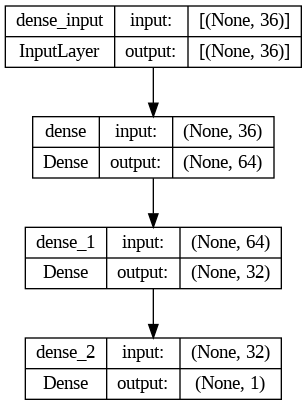

In [82]:
# Plot Layers

tf.keras.utils.plot_model(model_sequential, show_shapes=True)

## 6.2 - Functional API

The modeling with ANN use Functional API have advantages and weakness.

> Advantages

  *   It is more flexible than the sequential API. 
  *   It is more powerful than the sequential API in the sense branching or sharing of layers is allowed here. 
  *   The functional API is suitable for use when we want to create a model that is not linear and also it can have multiple inputs and outputs.

> Weakness

  * Takes time, we need to define the standalone Input layer that specifies the shape of input data. We also need to define the model using Keras Model class which requires the input and output layers.

In [132]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [133]:
# create Functional API

input_layer = Input(shape=(36,))
hidden_layer_1 = Dense(64, activation='relu')(input_layer)
hidden_layer_2 = Dense(32, activation='relu')(hidden_layer_1)

concat_layer = concatenate([input_layer, hidden_layer_2])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics='accuracy')
model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 36)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 64)           2368        ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 32)           2080        ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 68)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

For the `Functional API` base model, uses `36 Input Layer`, `64 Hidden Layer 1`, `32 Hidden Layer 2` and `1 Output Layer` because of binary classification. Decided to use 64 and 32 hidden layer, because hidden layer 1 is must more bigger than input layer and hidden layer 2 is must smaller than hidden layer 1.

After trial and error, this is the fit combination for base model.

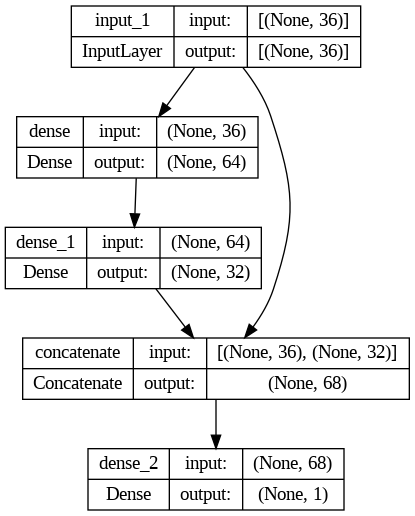

In [134]:
# Plot Layers

tf.keras.utils.plot_model(model_functional, show_shapes=True)

# vii. Model Training

This chapter contains only the code for training the model and the resulting output. Analysis and narrative of these results in the Model Evaluation section.

## 7.1 - Sequential API

### Sequential API: Model 1

In [83]:
# Train the model

%%time
history_seq = model_sequential.fit(train_pipe,
                                   epochs=40,
                                   validation_data=val_pipe)

Epoch 1/40
740/740 [==============================] - 3s 2ms/step - loss: 0.3012 - accuracy: 0.8392 - val_loss: 0.2573 - val_accuracy: 0.8571
Epoch 2/40
740/740 [==============================] - 2s 2ms/step - loss: 0.2561 - accuracy: 0.8587 - val_loss: 0.2549 - val_accuracy: 0.8591
Epoch 3/40
740/740 [==============================] - 3s 3ms/step - loss: 0.2534 - accuracy: 0.8597 - val_loss: 0.2541 - val_accuracy: 0.8598
Epoch 4/40
740/740 [==============================] - 2s 2ms/step - loss: 0.2522 - accuracy: 0.8607 - val_loss: 0.2545 - val_accuracy: 0.8591
Epoch 5/40
740/740 [==============================] - 2s 2ms/step - loss: 0.2509 - accuracy: 0.8622 - val_loss: 0.2540 - val_accuracy: 0.8618
Epoch 6/40
740/740 [==============================] - 2s 2ms/step - loss: 0.2506 - accuracy: 0.8630 - val_loss: 0.2540 - val_accuracy: 0.8621
Epoch 7/40
740/740 [==============================] - 2s 2ms/step - loss: 0.2498 - accuracy: 0.8652 - val_loss: 0.2540 - val_accuracy: 0.8628
Epoch 

For the best `epochs` in Sequential API: Model 1 is `40`. Because if it's more than 40, the gap between `accuracy` anf `val_accuracy` is more bigger, and the gap between `loss` and `val_loss` too.

So, epochs 40 is the best decision for this model. Base model will improved in Sequential API: Model 2 to get best model in Sequential API.

In [84]:
# Create DataFrame

history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.301239,0.839191,0.257313,0.857070
1,0.256103,0.858706,0.254862,0.859098
2,0.253427,0.859720,0.254078,0.859774
3,0.252215,0.860733,0.254460,0.859098
4,0.250942,0.862169,0.253954,0.861801
5,0.250588,0.862972,0.254028,0.862139
6,0.249754,0.865211,0.253974,0.862815
7,0.249113,0.865422,0.254337,0.860618
8,0.248264,0.866478,0.255228,0.863659
9,0.247710,0.868970,0.254386,0.865856


Dataframe result above shows us about in epochs `40`, `loss` and `val_loss` have gap has a rather large gap of about `0.03`. Whereas in `accuracy` and `val_accuracy` the difference is small, only about `0.01`. However, this model will be developed with optimizer and others to get a better model than this.

<Axes: >

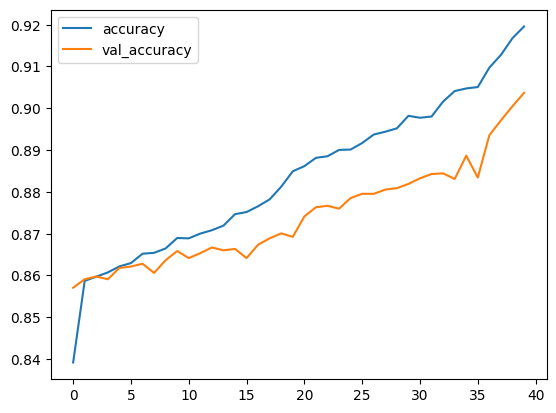

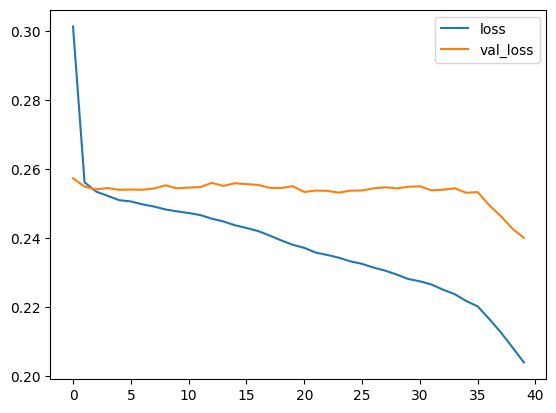

In [85]:
# Plot Training Results

history_seq_df[['accuracy', 'val_accuracy']].plot()
history_seq_df[['loss', 'val_loss']].plot()

From the graphic above, shows that the `val_accuracy` and `val_loss` has values over and under (bigger different) `accuracy` and `loss` values. This means the model is not good generated or has a little **overfitting**.


### Sequential API: Model 2

In [125]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [119]:
# Define Sequential API Model 2

model_seq2 = Sequential([Dense(96, activation='relu', input_shape=(36,)),
                         Dense(16, activation='relu'),
                         Dense(1, activation='sigmoid'),
                         ])

For the `Sequential API: Model 2`, the Hidden Layer 1 use `96` layers and Hidden Layer 2 use `16` layers. The objective of this second model is find out the best model for Sequential API.

In [120]:
# Compile Sequential API Model 2

model_seq2.compile(optimizer='sgd', 
                   loss='binary_crossentropy', 
                   metrics=['accuracy'])

model_seq2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 96)                3552      
                                                                 
 dense_1 (Dense)             (None, 16)                1552      
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


`Sequential API: Model 2` has a different optimizer from Model 1. In this second model, uses `sgd` optimizer and the metrics is still the same with Model 1.

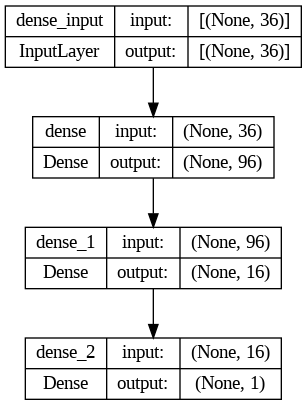

In [121]:
# Plot Layers Model 2

tf.keras.utils.plot_model(model_seq2, show_shapes=True)

In [122]:
# Train the Model 2

%%time
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.0001)

history_seq2 = model_seq2.fit(train_pipe,
                              epochs=90,
                              validation_data=val_pipe,
                              callbacks=[reduce_lr])

Epoch 1/90
740/740 [==============================] - 5s 6ms/step - loss: 0.5400 - accuracy: 0.7416 - val_loss: 0.3656 - val_accuracy: 0.8495 - lr: 0.0100
Epoch 2/90
740/740 [==============================] - 2s 3ms/step - loss: 0.3029 - accuracy: 0.8500 - val_loss: 0.2782 - val_accuracy: 0.8510 - lr: 0.0100
Epoch 3/90
740/740 [==============================] - 2s 2ms/step - loss: 0.2687 - accuracy: 0.8517 - val_loss: 0.2658 - val_accuracy: 0.8552 - lr: 0.0100
Epoch 4/90
740/740 [==============================] - 2s 2ms/step - loss: 0.2617 - accuracy: 0.8556 - val_loss: 0.2615 - val_accuracy: 0.8537 - lr: 0.0100
Epoch 5/90
740/740 [==============================] - 2s 2ms/step - loss: 0.2585 - accuracy: 0.8574 - val_loss: 0.2598 - val_accuracy: 0.8557 - lr: 0.0100
Epoch 6/90
740/740 [==============================] - 2s 2ms/step - loss: 0.2569 - accuracy: 0.8566 - val_loss: 0.2580 - val_accuracy: 0.8604 - lr: 0.0100
Epoch 7/90
740/740 [==============================] - 2s 2ms/step - lo

Data train for `Sequential API: Model 2` uses `ReduceLROnPlateau`. This is intended for scheduling techniques that monitor the quantity and decay the learning rate when the stop quantity increases. The LR method has the advantage of being able to analyze the relationship between variables.

Besides that, in this train model, uses `epochs 90` in order to produce convergent values.

In [123]:
# Create DataFrame

history_seq2_df = pd.DataFrame(history_seq2.history)
history_seq2_df

,loss,accuracy,val_loss,val_accuracy,lr
0,0.540029,0.741615,0.365624,0.849468,0.0100
1,0.302925,0.850046,0.278187,0.850988,0.0100
2,0.268678,0.851736,0.265765,0.855212,0.0100
3,0.261722,0.855580,0.261462,0.853692,0.0100
4,0.258525,0.857396,0.259760,0.855719,0.0100
...,...,...,...,...,...
85,0.244098,0.874504,0.254451,0.858084,0.0001
86,0.244097,0.875011,0.254454,0.857915,0.0001
87,0.244096,0.874588,0.254453,0.857915,0.0001
88,0.244095,0.874757,0.254449,0.858253,0.0001


Dataframe result above shows us about in epochs `90`, `loss` and `val_loss` have small gap of about `0.001`. Whereas in `accuracy` and `val_accuracy` the difference is small, only about `0.01`. 

<Axes: >

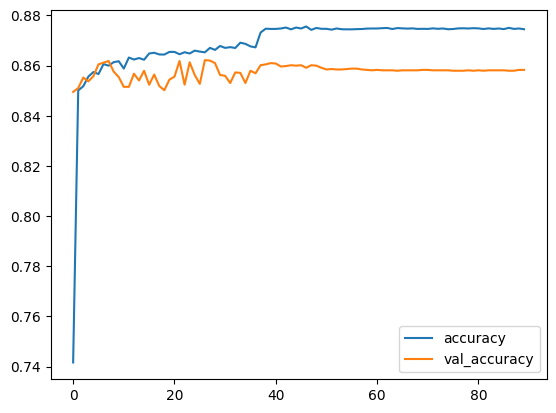

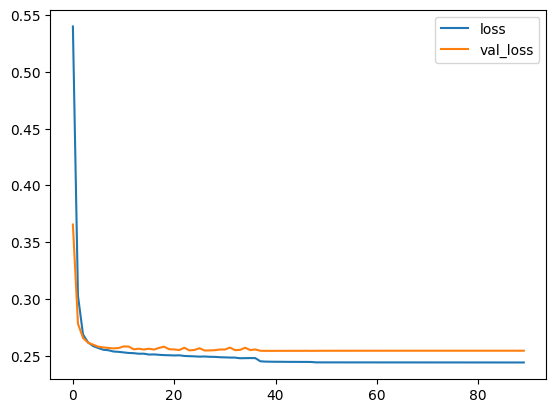

In [124]:
# Plot Training Results

history_seq2_df[['accuracy', 'val_accuracy']].plot()
history_seq2_df[['loss', 'val_loss']].plot()

Based on the graphic above, shows that: 
- The difference or gap between `accuracy` and `val_accuracy` is not much, which is around 0.01.
- There is almost no difference or gap between `loss` and `val_loss`, the value between the two is almost the same.
- This proves that between the two graphs, `Sequential API: Model 2` has a **good fit**. Although the score between the two is only between 86-88.
- I have tried using `optimizer: adam` and changing the value of the hidden layer, but this composition using `optimizer: sgd` is the right decision. When using `adam`, the model shows overfitting even though the value is >90.

## 7.2 - Functional API

### Functional API: Model 1

In [135]:
# Train the Model

%%time
history_func = model_functional.fit(train_pipe,
                                    epochs=30,
                                    validation_data=val_pipe)

Epoch 1/30
740/740 [==============================] - 3s 3ms/step - loss: 0.3009 - accuracy: 0.8405 - val_loss: 0.2581 - val_accuracy: 0.8561
Epoch 2/30
740/740 [==============================] - 3s 4ms/step - loss: 0.2556 - accuracy: 0.8571 - val_loss: 0.2577 - val_accuracy: 0.8515
Epoch 3/30
740/740 [==============================] - 2s 2ms/step - loss: 0.2537 - accuracy: 0.8596 - val_loss: 0.2554 - val_accuracy: 0.8588
Epoch 4/30
740/740 [==============================] - 2s 2ms/step - loss: 0.2522 - accuracy: 0.8600 - val_loss: 0.2548 - val_accuracy: 0.8611
Epoch 5/30
740/740 [==============================] - 2s 2ms/step - loss: 0.2511 - accuracy: 0.8622 - val_loss: 0.2549 - val_accuracy: 0.8583
Epoch 6/30
740/740 [==============================] - 2s 2ms/step - loss: 0.2502 - accuracy: 0.8642 - val_loss: 0.2544 - val_accuracy: 0.8599
Epoch 7/30
740/740 [==============================] - 2s 3ms/step - loss: 0.2494 - accuracy: 0.8664 - val_loss: 0.2544 - val_accuracy: 0.8604
Epoch 

For `Functional API: Model 1`, the best base model uses epochs 30. If use epochs >30, the base model will overfit.

In [136]:
## Create DataFrame

history_func_df = pd.DataFrame(history_func.history)
history_func_df

,loss,accuracy,val_loss,val_accuracy
0,0.300939,0.840500,0.258083,0.856057
1,0.255562,0.857143,0.257673,0.851495
2,0.253653,0.859635,0.255365,0.858760
3,0.252197,0.860015,0.254780,0.861125
4,0.251057,0.862212,0.254906,0.858253
5,0.250161,0.864239,0.254399,0.859943
6,0.249393,0.866394,0.254417,0.860449
7,0.248775,0.866605,0.254812,0.860280
8,0.248361,0.866605,0.254849,0.863153
9,0.247698,0.867787,0.254991,0.858929


Based on DataFrame results above, `loss` and `val_loss` has a significant difference in value with `val_loss` which is around `0.03`. Whereas `accuracy` and `val_accuracy` have almost the same value and there is no significant difference.

However, it is necessary to do model improvement to get the best model compared to the base model.

<Axes: >

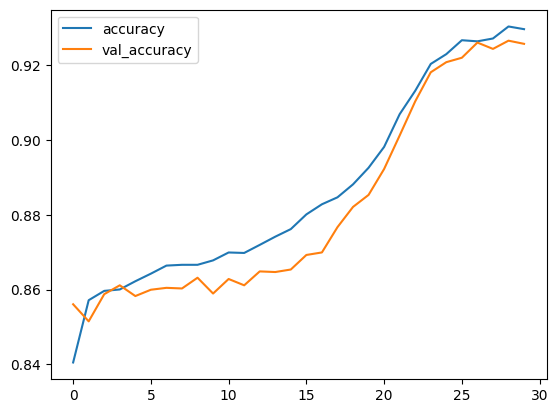

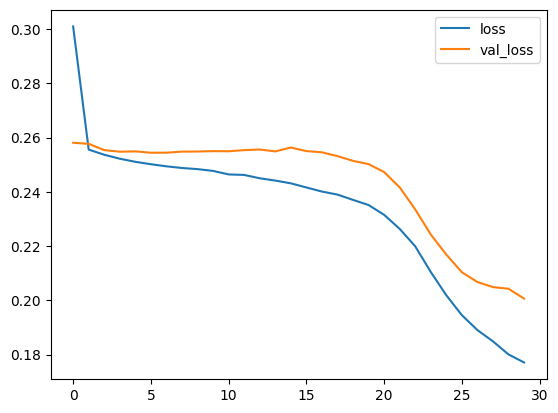

In [137]:
# Plot Training Results

history_func_df[['accuracy', 'val_accuracy']].plot()
history_func_df[['loss', 'val_loss']].plot()

From the graphic above, shows that the both graphic have a **almost goodfit** model because the difference between the original value and validation has no significant difference and the value is almost the same.

### Functional API: Model 2

In [157]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [158]:
# Create Functional API Model 2

input_layer = Input(shape=(36,))
hidden_layer_1 = Dense(64, activation='relu')(input_layer)
hidden_layer_2 = Dense(16, activation='relu')(hidden_layer_1)

concat_layer = concatenate([input_layer, hidden_layer_2])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_func2 = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_func2.compile(loss='binary_crossentropy',
                    optimizer='sgd',
                    metrics='accuracy')
model_func2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 36)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 64)           2368        ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 16)           1040        ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 52)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

In the `Functional API: Model 2`, uses `36 Input Layer`, `64 Hidden Layer 1`, `16 Hidden Layer 2`, and `1 Ouput Layer`. In this model, I changed the optimizer from `adam in Model 1` to `sgd in Model 2`. Besides that, the Hidden Layer in Model 2 also have a different value from Model 1.

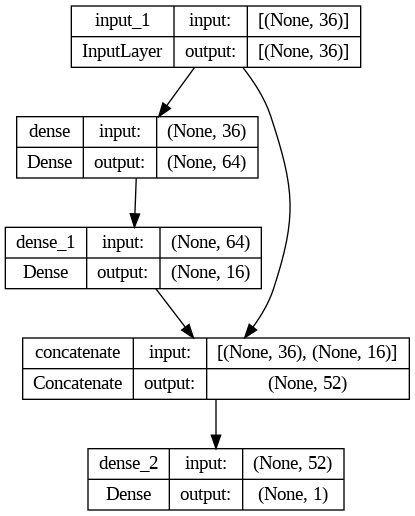

In [159]:
# Plot Layers

tf.keras.utils.plot_model(model_func2, show_shapes=True)

In [160]:
# Train the Model 2

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.0001)

history_func2 = model_func2.fit(train_pipe,
                                epochs=50, 
                                validation_data=val_pipe,
                                callbacks=[reduce_lr])

Epoch 1/50
740/740 [==============================] - 2s 2ms/step - loss: 0.5933 - accuracy: 0.7038 - val_loss: 0.4824 - val_accuracy: 0.8307 - lr: 0.0100
Epoch 2/50
740/740 [==============================] - 2s 3ms/step - loss: 0.3973 - accuracy: 0.8484 - val_loss: 0.3340 - val_accuracy: 0.8469 - lr: 0.0100
Epoch 3/50
740/740 [==============================] - 2s 3ms/step - loss: 0.2991 - accuracy: 0.8555 - val_loss: 0.2847 - val_accuracy: 0.8458 - lr: 0.0100
Epoch 4/50
740/740 [==============================] - 2s 3ms/step - loss: 0.2727 - accuracy: 0.8574 - val_loss: 0.2710 - val_accuracy: 0.8518 - lr: 0.0100
Epoch 5/50
740/740 [==============================] - 2s 2ms/step - loss: 0.2643 - accuracy: 0.8584 - val_loss: 0.2654 - val_accuracy: 0.8540 - lr: 0.0100
Epoch 6/50
740/740 [==============================] - 2s 2ms/step - loss: 0.2602 - accuracy: 0.8604 - val_loss: 0.2625 - val_accuracy: 0.8562 - lr: 0.0100
Epoch 7/50
740/740 [==============================] - 2s 2ms/step - lo

Data train for `Functional API: Model 2` uses `ReduceLROnPlateau` like Sequential API: Model 2. This is intended for scheduling techniques that monitor the quantity and decay the learning rate when the stop quantity increases. The LR method has the advantage of being able to analyze the relationship between variables.

Besides that, in this train model, uses `epochs 50` in order to produce convergent values.

In [161]:
## Create DataFrame

history_func2_df = pd.DataFrame(history_func2.history)
history_func2_df

,loss,accuracy,val_loss,val_accuracy,lr
0,0.593272,0.703768,0.482381,0.830715,0.0100
1,0.397298,0.848357,0.334044,0.846934,0.0100
2,0.299075,0.855538,0.284723,0.845751,0.0100
3,0.272735,0.857396,0.271037,0.851833,0.0100
4,0.264334,0.858368,0.265431,0.854029,0.0100
5,0.260224,0.860353,0.262549,0.856226,0.0100
6,0.257825,0.861451,0.260848,0.854536,0.0100
7,0.256197,0.860184,0.259637,0.857239,0.0100
8,0.255226,0.862212,0.258904,0.853692,0.0100
9,0.254162,0.862972,0.258285,0.861970,0.0100


From the DafaFrame above, value between `loss` and `val_loss` have a no significant different values and close enough. Meanwhile in `accuracy` and `val_accuracy` has a difference of about `0.01`. But the value per epoch shows that it has almost the same value.

<Axes: >

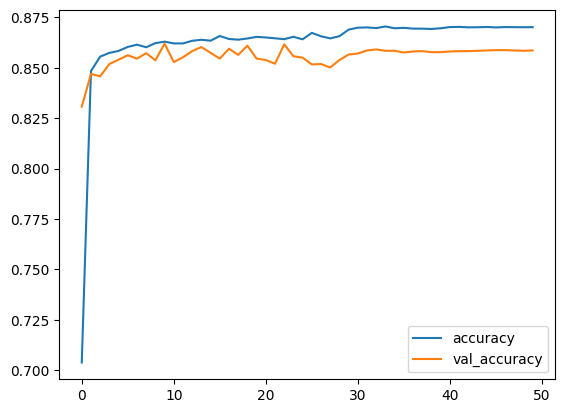

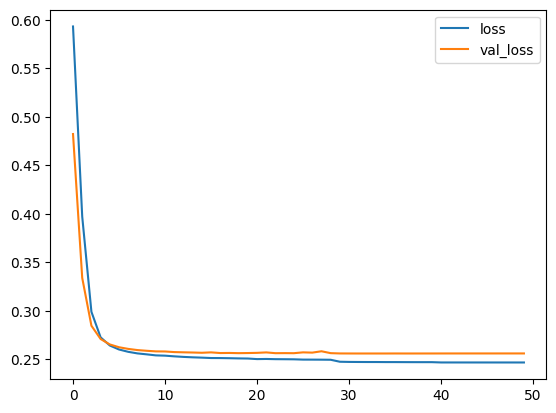

In [162]:
# Plot Training Results

history_func2_df[['accuracy', 'val_accuracy']].plot()
history_func2_df[['loss', 'val_loss']].plot()

Based on graphic visualization above, shows that:
*   The `accuracy` and `val_accuracy` values do not have a significant difference, only 0.01.
- The `loss` and `val_loss` values are almost the same.
- The graph has convergent visuals so that this model is included in **good fit**.
- In `Functional API: Model 2`, I changed `optimizer: adam` to `optimizer: sgd` to get a **goodfit** model even though the accuracy score is only 85-87.5. Apart from that, in this model I also change the hidden layer which is different from Model 1.

Model 1 uses optimizer: adam and produces an accuracy value of >90, but the training results are not good fit.



## 7.3 - Best Model

After training 4 different ANN model (2 Models for Sequential API and 2 Models, 2 Models for Functional API), then evaluate each models by their learning curve and the plotting of loss function-accuracy gradient between train and valid set. The model which has the least loss function and the slightest degree of discrepancy in loss & accuracy can be nominated as best model among the others.

With 4 models above, the **best model** in `Model Improvement` (both Sequential API and Functional API have a good fit model) and have values:
1. Sequential API has different 0.01 points for loss and 0.016 for accuracy between train and valid set.
2. Functional API has different 0.009 points for loss and 0.011 for accuracy between train and valid set.

So, the best model is **Sequential API: Model 2 (After Improvement)**. But, to make sure them, model evaluation is good tools to compare it.

# viii. Model Evaluation

This chapter contains a model evaluation that shows how the model performs based on the selected metrics. In this chapter, it is proven by visualizing performance trends and/or model error rates. As well as analysis related to the results on the model.

## 8.1 - Train-Set

In [173]:
# Predict `y` in train set by using Best Sequential API Model and Functional API Model

y_pred_train_seq = model_seq2.predict(X_train)
y_pred_train_func = model_func2.predict(X_train)

740/740 [==============================] - 1s 1ms/step


In [174]:
# Convert y_pred into class 1,0 or class 0 using numpy

y_pred_train_seq = np.where(y_pred_train_seq >= 0.5, 1, 0)
y_pred_train_func = np.where(y_pred_train_func >= 0.5, 1, 0)

In [175]:
# Evaluate Train-Set of two improvement models

print('Classification Report in Train Set on Sequential API model:\n', classification_report(y_train, y_pred_train_seq))
print('Classification Report in Train Set on Functional API model:\n', classification_report(y_train, y_pred_train_func))

Classification Report in Train Set on Sequential API model:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87     10874
           1       0.90      0.86      0.88     12800

    accuracy                           0.88     23674
   macro avg       0.87      0.88      0.87     23674
weighted avg       0.88      0.88      0.88     23674

Classification Report in Train Set on Functional API model:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86     10874
           1       0.90      0.85      0.88     12800

    accuracy                           0.87     23674
   macro avg       0.87      0.87      0.87     23674
weighted avg       0.87      0.87      0.87     23674



From the `Classification Report - Train Set` above shows that:
> Sequential API

*   `Accuracy Score` is 88%.
*   For churn risk customer cases, it will focuse on the `recall score` because the **False Negative** one will make a **bias or endanger the company** because customers who are at risk of churn will be predicted not to churn.
*   On label `0 (not to churn)` there is `89%` customers that have actual not to churn and predicted true, while the remaining 11% is wrong prediction does not churn.
*   On label `1 (to churn)` there is `86%` customers that have actual to churn and predicted true, while the remaining `14%` is wrong prediction does to churn.

> Functional API

* `Accuracy Score` is 87%.
* Like the Sequential API, this model will focuse on the `recall score` because the **False Negative** one will make a **bias or endanger the company** because customers who are at risk of churn will be predicted not to churn.
*  On label `0 (not to churn)` there is `89%` customers that have actual not to churn and predicted true, while the remaining 19% is wrong prediction does not churn.
*   On label `1 (to churn)` there is `85%` customers that have actual to churn and predicted true, while the remaining `15%` is wrong prediction does to churn.



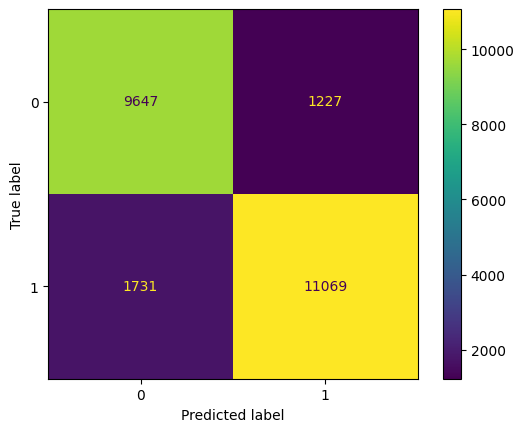

In [176]:
# Evaluate using confusion_matrix in Train Set from Sequential API Model 2

cm = confusion_matrix(y_train, y_pred_train_seq)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

Based on visualization of `Confusion Matrix - Train Set - Sequential API` shows that:
* There are `9647` customers that actual have not to churn (`0`) and predicted as it does. True Positive
* There are `1227` customers that actual have not to churn (`0`) but predicted as to churn (`1`). False Positive
* There are `1731` customers that actual have to churn (`1`) but predicted as not to churn (`0`). **False Negative**
* There are `11069` customers that actual have to churn (`1`) and predicted as it does. True Negative

The modeling classification will focuse on False Negative which has a small amount.

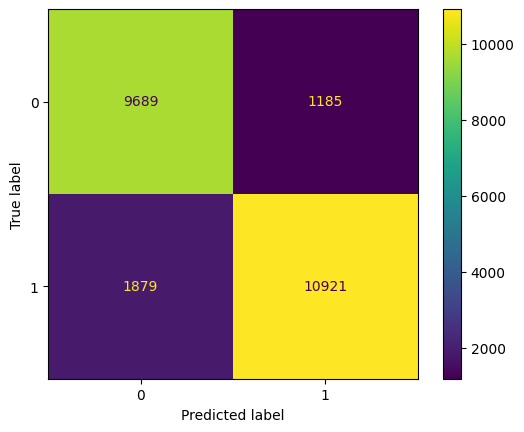

In [177]:
# Evaluate using confusion_matrix in Train Set from Functional API Model 2

cm = confusion_matrix(y_train, y_pred_train_func)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

Based on visualization of `Confusion Matrix - Train Set - Functional API` shows that:
* There are `9689` customers that actual have not to churn (`0`) and predicted as it does. True Positive
* There are `1185` customers that actual have not to churn (`0`) but predicted as to churn (`1`). False Positive
* There are `1879` customers that actual have to churn (`1`) but predicted as not to churn (`0`). **False Negative**
* There are `10921` customers that actual have to churn (`1`) and predicted as it does. True Negative

The modeling classification will focuse on False Negative which has a small amount.

## 8.2 - Test-Set

In [178]:
# Predict `y` in test set by using Best Sequential API Model and Functional API Model

y_pred_test_seq = model_seq2.predict(X_test)
y_pred_test_func = model_func2.predict(X_test)

232/232 [==============================] - 0s 1ms/step


In [179]:
# Convert y_pred into class 1,0 or class 0 using numpy

y_pred_test_seq = np.where(y_pred_test_seq >= 0.5, 1, 0)
y_pred_test_func = np.where(y_pred_test_func >= 0.5, 1, 0)

In [180]:
# Evaluate Test-Set of two improvement models

print('Classification Report in Test Set on Sequential API model:\n', classification_report(y_test, y_pred_test_seq))
print('Classification Report in Test Set on Functional API model:\n', classification_report(y_test, y_pred_test_func))

Classification Report in Test Set on Sequential API model:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      3411
           1       0.86      0.86      0.86      3988

    accuracy                           0.85      7399
   macro avg       0.85      0.85      0.85      7399
weighted avg       0.85      0.85      0.85      7399

Classification Report in Test Set on Functional API model:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      3411
           1       0.89      0.84      0.86      3988

    accuracy                           0.86      7399
   macro avg       0.86      0.86      0.86      7399
weighted avg       0.86      0.86      0.86      7399



From the `Classification Report - Train Set` above shows that:
> Sequential API

*   `Accuracy Score` is 85%.
*   For churn risk customer cases, it will focuse on the `recall score` because the **False Negative** one will make a **bias or endanger the company** because customers who are at risk of churn will be predicted not to churn.
*   On label `0 (not to churn)` there is `84%` customers that have actual not to churn and predicted true, while the remaining 16% is wrong prediction does not churn.
*   On label `1 (to churn)` there is `86%` customers that have actual to churn and predicted true, while the remaining `14%` is wrong prediction does to churn.

> Functional API

* `Accuracy Score` is 86%.
* Like the Sequential API, this model will focuse on the `recall score` because the **False Negative** one will make a **bias or endanger the company** because customers who are at risk of churn will be predicted not to churn.
*  On label `0 (not to churn)` there is `88%` customers that have actual not to churn and predicted true, while the remaining 12% is wrong prediction does not churn.
*   On label `1 (to churn)` there is `84%` customers that have actual to churn and predicted true, while the remaining `16%` is wrong prediction does to churn.


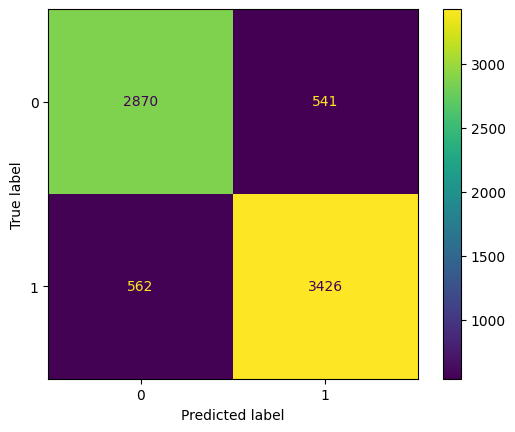

In [181]:
# Evaluate using confusion_matrix in Test Set from Sequential API Model 2

cm = confusion_matrix(y_test, y_pred_test_seq)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

Based on visualization of `Confusion Matrix - Test Set - Sequential API` shows that:
* There are `2870` customers that actual have not to churn (`0`) and predicted as it does. True Positive
* There are `541` customers that actual have not to churn (`0`) but predicted as to churn (`1`). False Positive
* There are `562` customers that actual have to churn (`1`) but predicted as not to churn (`0`). **False Negative**
* There are `3426` customers that actual have to churn (`1`) and predicted as it does. True Negative

The modeling classification in Test-Set will focuse on False Negative which has a small amount, which is Sequential API has 562 customers.

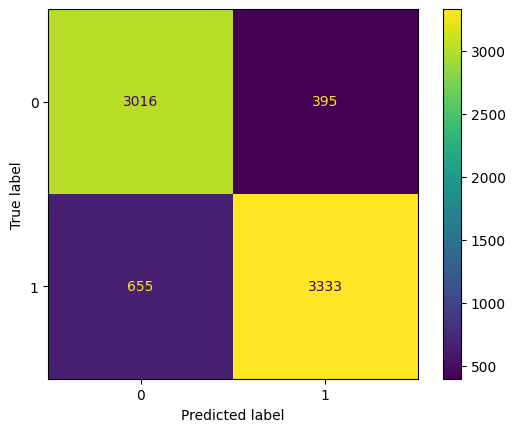

In [182]:
# Evaluate using confusion_matrix in Test Set from Functional API Model 2

cm = confusion_matrix(y_test, y_pred_test_func)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

Based on visualization of `Confusion Matrix - Test Set - Functional API` shows that:
* There are `3016` customers that actual have not to churn (`0`) and predicted as it does. True Positive
* There are `395` customers that actual have not to churn (`0`) but predicted as to churn (`1`). False Positive
* There are `655` customers that actual have to churn (`1`) but predicted as not to churn (`0`). **False Negative**
* There are `3333` customers that actual have to churn (`1`) and predicted as it does. True Negative

The Functional API - Test Set has False Negative is bigger than Sequential API.

## 8.3 - Best Model

Based on comparation between `Sequential API` and `Functional API` with `Classification Report` and `Confusion Matrix`, shows that:
1.   Train-Set Score in `Sequential API` has a bigger value than `Functional API`, which is 88%. Meanwhile the Test-Set Score in `Sequential API` has 85% and `Functional API` has 84%.
2.   In confusion matrix, the **False Negative** result in training model at Sequential API, have a minimum value, which is `1731` customers and the test model have a value `562` customers. This value is smaller than the result by Functional API.
3.  False Negative values are taken for the minimum value so as not to endanger the company in which it deals with customers who have a risk of churn. This can cause the company's performance to go down and make a loss.

So, the best classification model with ANN is `Sequential API: Model 2` (after improvement). 



# ix. Model Saving

In this section, the process of storing models and other files related to the results of the model creation process is carried out.

In [187]:
# Save Pipeline

import pickle

with open('final_pipeline.pkl', 'wb') as file_1:
  pickle.dump(final_pipeline, file_1)

In [188]:
# Summary of Model Sequential API: Model 2

model_seq2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 96)                3552      
                                                                 
 dense_1 (Dense)             (None, 16)                1552      
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [189]:
# Freeze Model

model_seq2.trainable = False
model_seq2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 96)                3552      
                                                                 
 dense_1 (Dense)             (None, 16)                1552      
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 5,121
Trainable params: 0
Non-trainable params: 5,121
_________________________________________________________________


In [190]:
# Save ANN Model

model_seq2.save('customer_churn.h5')

# x. Model Inference

Models that have been trained will be tried on data that is not included in the train-set or test-set. This data is in the original format, not the data that has been scaled.

Model Inference can see [here](https://colab.research.google.com/drive/147QuuSVirxmbyAQXicoA3VCyxeKF7HPF?usp=sharing).


# xi. Conclusion

This chapter contains conclusions that reflect the results obtained with the objectives that have been written in the introduction section.

## 11.1 - Model Analysis

1.   Best model for classfication with Artifical Neural Network (ANN) method is `Sequential API: Model 2` with 36 Input Layer, 96 Hidden Layer 1, 16 Hidden Layer 2, and 1 Ouput Layer. This model used `optimizer: sgd` and `ReduceLROnPlateau`.
2.   This best model produces a Train-Set score of 88% and a Test-Set score of 85%. The label of customer churn is `0: not to churn, 1: to churn`.
3.   There are `562` customers had wrong prediction in data test. They should be customers who are at risk of churn, but are predicted not to churn. This will harm the company.
4.   SGD (Stochastic Gradient Descent) have some strengths. Despite superior training outcomes, Adam and other adaptive optimization methods are known to generalize poorly compared to Stochastic Gradient Descent (SGD). These methods tend to perform well on the training data but are **outperformed by SGD on the test data**.
5.   The weakness of SGD is SGD has trouble navigating areas where the surface of optimization function curves much more steeply into one.



## 11.2 - Overall Analysis

1. The data target is `balanced`. So, we can use metrics `accuracy`.
2. The `age` customers in this company from 10 years old until 64 years old. The `gender` distribution of customers here is evenly distributed because there is no significant difference between women and men.
3. Based on heatmap correlation, `avg_frequency_login_days` has highest score with `churn_risk_score`. It means both columns have strong correlation. Meanwhile, `points_in_wallet and avg_transaction_value` have (negative) correlation with churn risk. It means the columns don't have a correlation with churn risk.
4.  Besides that, `membership_category, preffered_offer_types, and feedback` has a major influence on customer risk to churn. Because those who are categorized as disloyal (basic members) have a high risk of churning. This is affect to customer satisfaction too (look at `feedback` column).

## 11.3 - Business Implementation

1. The company must hit the `562` customers that has been predicted in the test data. This is to reduce losses to the company.
2. Company can provide several offers and special prices for customers who are at risk of churn, so they are interested in buying products from this company. Improving performance in digital marketing will help overcome this problem.
3. The business team can analyze feedback forms from customers to improve product sales performance and correct previous mistakes.

## 11.4 - Model Improvement

1. Add `callback` hyperparameters or change the `optimizer` to further improve model performance, such as dropout and batch normalization.
2. Change and do trial and error in `hidden layer` to get best model results.
3. Add `epochs` because the greater the epoch value can indicate convergence.